<a href="https://colab.research.google.com/github/ayush2444/Bike-Sharing-Demand-Prediction-/blob/main/machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Seoul Bike Sharing Demand Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Bike sharing systems provide a convenient method for renting bicycles through a network of kiosks located throughout a city, where individuals can obtain membership, rent a bike, and automatically return it to any other kiosk location as per their requirement.


With over 500 bike-sharing programs operating globally, the trend of bike and scooter ride-sharing has gained significant momentum, particularly in metropolitan areas such as San Francisco, New York, Chicago, and Los Angeles. However, predicting bike demand on a specific day remains a crucial challenge for these businesses.

The bike sharing system market is picking up speed and gaining momentum globally. In 2019, its market share was valued at an impressive 3.39 billion, and industry experts predict that it will surge to a whopping $6.98 billion by 2027, with a projected compound annual growth rate of around 14% from 2020 to 2027.


Our objective is to develop a predictive model that can estimate the approximate number of bikes rented based on the available dataset, considering that bike sharing systems typically rent bikes on an hourly, daily, or monthly basis, with static pricing inclusive of these time periods. The system's affordability and user-friendly renting process have made it a popular choice for commuters of all kinds.

Our project aims to utilise historical bike usage patterns and weather data to forecast the demand for bike rentals. The dataset we are working with comprises hourly rental data for a span of two years. Specifically, the training set includes data from the first 19 days of each month, while the test set encompasses the period from the 20th to the end of each month.

Our initial step is to conduct an Exploratory Data Analysis on the dataset. We examine the presence of any missing data values, though none were found, and identify and address any outliers in the dataset. Moreover, we carry out correlation analysis to identify the relevant and significant feature set, which we later modify through feature engineering. This involves adjusting a few existing columns and dropping any irrelevant ones from the dataset.



then further on Through the process of feature engineering and data preprocessing, we aimed to identify and isolate impactful features for our analysis. One of the initial steps in this process was to address multicollinearity within the independent variables. We accomplished this through the use of various inflation factor (VIF) measures. then we utilized the interquartile range (IQR) technique to detect and treat outliers in our data. We then capped all outliers of continuous features between the 25th and 75th percentile.

We also noted that certain features were categorical in nature, and as such, were unsuitable for input into a machine learning model in their current form. To address this, we encoded these features into numerical values using the One-Hot Encoding technique, as they were unordered in nature.

Following that, we have divided our dataset  into training and testing sets. The model is then trained using the selection of a machine learning algorithm and the training set of data. In order to determine how effectively the model can predict rented bike count, we lastly assessed its performance on the testing data

Our exploration of machine learning models for the Bike Sharing Demand dataset took us on a journey through various popular approaches. We started with the tried-and-true Linear Regressor, as well as Regularization Models like Ridge and Lasso, and even ventured into the realm of elasticnet. But we didn't stop there; we also delved into more sophisticated ensemble models like Random Forest, decision trees, and Gradient Boost.

Constructing a machine learning model for the Bike Sharing Demand Prediction dataset required a combination of data preprocessing, utilization of various machine learning techniques, and adept model evaluation skills. Despite the challenges, we were able to develop a high-performing model that can effectively predict  the demand of rented bikes. Among the multiple models we trained, XGboost outperformed the others and gave the highest r2 score.  **Finally**, we have developed a model that can successfully predict the demand for rented bikes.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [170]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error  
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


### Dataset Loading

In [171]:
# Load Dataset
URL='https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=share_link'
df= pd.read_csv('https://drive.google.com/uc?id='+URL.split('/')[-2] , encoding= 'unicode_escape')

### Dataset First View

In [172]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [173]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count





In [174]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

In [175]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [176]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [177]:
print(df.dtypes.astype(str).value_counts())

float64    6
object     4
int64      4
dtype: int64


In [178]:
# Dataset Duplicate Value Count
duplicate = df.duplicated().sum()
print('Total number of duplicate values are : ', duplicate)

Total number of duplicate values are :  0




* The dataset does not contain any duplicate rows or missing values.

*  Several feature names are quite long; perhaps they should be renamed
  




#### Missing Values/Null Values

In [179]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

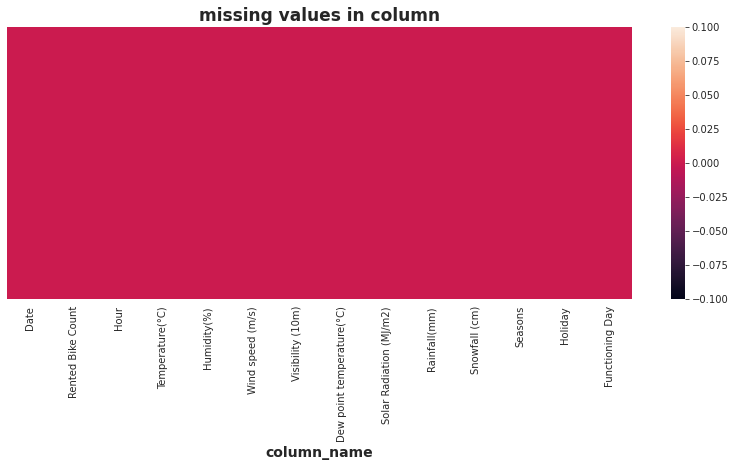

In [180]:
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()
     

### What did you know about your dataset?

The 'SeoulBikeData' dataset contains 8760 rows and 14 columns, and is free of any null or duplicate values. Additionally, there are four categorical features within this dataset, namely Date, Season, Holiday, and Functioning Day.

## ***2. Understanding Your Variables***

In [181]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [182]:
# Dataset Describe
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

### Variables Description



**The dataset includes date information, the number of bikes rented every hour, and weather data (temperature, humidity, windspeed, visibility, dewpoint, solar radiation, snowfall, and rainfall).**



* **Date** : year-month-day
*  **Rented Bike count** - Count of bikes rented at each hour
* **Hour** - Hour of he day
* **Temperature**-Temperature in Celsius
*  **Humidity** - Humidityin the air in %, type: int
* **Wind speed (m/s)** - Speed of the wind in m/s
*  **Visibility** - 10m
* **Dew point temperature(°C)** - The temperature at which the water starts to condense out of the air,
* **Solar radiation** - MJ/m2-Electromagnetic radiation emitted by the Sun
*   **Rainfall** - mm
*   **Holiday** - If the day is holiday or not
*   **Seasons** - Winter, Spring, Summer, Autumn
*  **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)
* **Snowfall** -Amount of snowfall in cm














#Renaming the features

In [183]:
df =df.rename(columns= {'Temperature(°C)':'temperature','Rented Bike Count': 'rented_bike_count', 
                        'Hour':'hour', 'Humidity(%)':'humidity',  'Dew point temperature(°C)':'dew_point_temp',
                        'Wind speed (m/s)': 'wind_speed','Visibility (10m)': 'visibility', 'Solar Radiation (MJ/m2)': 'solar_radiation',
                        'Seasons':'seasons', 'Functioning Day':'functioning_day', 'Holiday':'holiday', 'Snowfall (cm)':'snowfall','Rainfall(mm)': 'rainfall'})

### Check Unique Values for each variable.

In [184]:
# Check Unique Values for each variable.
df.nunique()  

Date                  365
rented_bike_count    2166
hour                   24
temperature           546
humidity               90
wind_speed             65
visibility           1789
dew_point_temp        556
solar_radiation       345
rainfall               61
snowfall               51
seasons                 4
holiday                 2
functioning_day         2
dtype: int64

In [185]:
# Check Unique Values for each variable.
print("the unique values of seasons are :", df['seasons'].unique())
print("the unique values of holidays are :", df['holiday'].unique())
print("the unique values of functioning_day  are :", df['functioning_day'].unique())
print("the unique values of date are :", df['Date'].unique())

print("the unique values of hour are :", df['hour'].unique())
print("the unique values of humidity are :", df['humidity'].unique())
print("the unique values of temperature are :", df['temperature'])


the unique values of seasons are : ['Winter' 'Spring' 'Summer' 'Autumn']
the unique values of holidays are : ['No Holiday' 'Holiday']
the unique values of functioning_day  are : ['Yes' 'No']
the unique values of date are : ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018

## 3. ***Data Wrangling***

### Data Wrangling Code

In [186]:
# importing datetime 
import datetime as dt
df['Date'] =df['Date'].apply(lambda x:  dt.datetime.strptime(x,'%d/%m/%Y'))
     

In [187]:
# extracting the year and month from the date feature
df['year'] = df['Date'].dt.year
df['month'] =df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday


In [188]:
# convert into category 
cat =['month','weekday', 'hour', 'year']
for i in cat:
  df[i]=df[i].astype('category')

In [189]:
## dropping ther date columns 
df = df.drop(columns = ['Date'], axis = 1)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rented_bike_count  8760 non-null   int64   
 1   hour               8760 non-null   category
 2   temperature        8760 non-null   float64 
 3   humidity           8760 non-null   int64   
 4   wind_speed         8760 non-null   float64 
 5   visibility         8760 non-null   int64   
 6   dew_point_temp     8760 non-null   float64 
 7   solar_radiation    8760 non-null   float64 
 8   rainfall           8760 non-null   float64 
 9   snowfall           8760 non-null   float64 
 10  seasons            8760 non-null   object  
 11  holiday            8760 non-null   object  
 12  functioning_day    8760 non-null   object  
 13  year               8760 non-null   category
 14  month              8760 non-null   category
 15  weekday            8760 non-null   category
dtypes: cat

In [191]:
# read the data for the year
df['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

In [192]:
# year month count from the data set
df.groupby(['year','month']).agg({'rented_bike_count':['sum']}).reset_index()

year month rented_bike_count
                             sum
0   2017     1                 0
1   2017     2                 0
2   2017     3                 0
3   2017     4                 0
4   2017     5                 0
5   2017     6                 0
6   2017     7                 0
7   2017     8                 0
8   2017     9                 0
9   2017    10                 0
10  2017    11                 0
11  2017    12            185330
12  2018     1            150006
13  2018     2            151833
14  2018     3            380594
15  2018     4            524227
16  2018     5            707088
17  2018     6            896887
18  2018     7            734460
19  2018     8            651887
20  2018     9            673612
21  2018    10            650675
22  2018    11            465715
23  2018    12                 0

### What all manipulations have you done and insights you found?

Answer Here.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**EDA (Exploratory Data Analysis)** ##





##**Univariate Analysis**##

#### Chart - 1

Text(0, 0.5, 'Density')

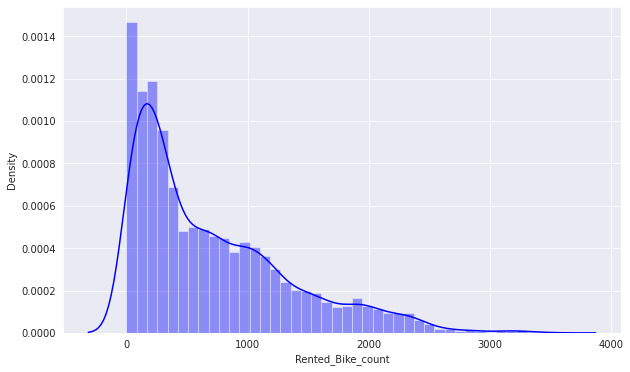

In [193]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
ax = sns.distplot(df['rented_bike_count'], hist=True , color = 'blue')
plt.xlabel('Rented_Bike_count')
plt.ylabel('Density')

##### 1. Why did you pick the specific chart?

We have picked this chart to check the distribution of the dependent variable 

##### 2. What is/are the insight(s) found from the chart?

Given that the distribution of the dependent variable must be normal for linear regression to work, the dependent variable appears to be moderately right skewed in the distribution plot shown above. As a result, we should perform some operations to make the distribution of the dependent variable normal.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

ans

#### Chart - 2

<Axes: xlabel='rented_bike_count'>

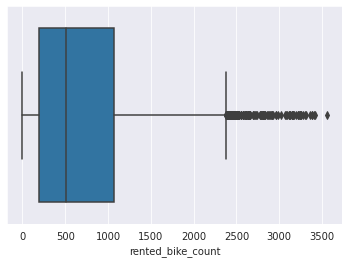

In [194]:
# Chart - 2 visualization code
sns.boxplot(x=df['rented_bike_count'])



* Outliers can be found in the rented bike count data, as seen by the boxplot above.


<Axes: xlabel='rented_bike_count'>

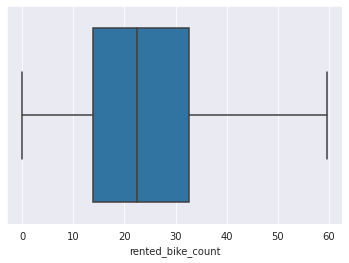

In [195]:
# Normalizing the skewed data by using the square root transformation.
sns.boxplot(x = np.sqrt(df['rented_bike_count']))

##### 1. Why did you pick the specific chart?

Here we have picked this boxplot to check the outlier in dependent variable

##### 2. What is/are the insight(s) found from the chart?

After the removal of outliers from the square root transformation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3

Text(0, 0.5, 'Density')

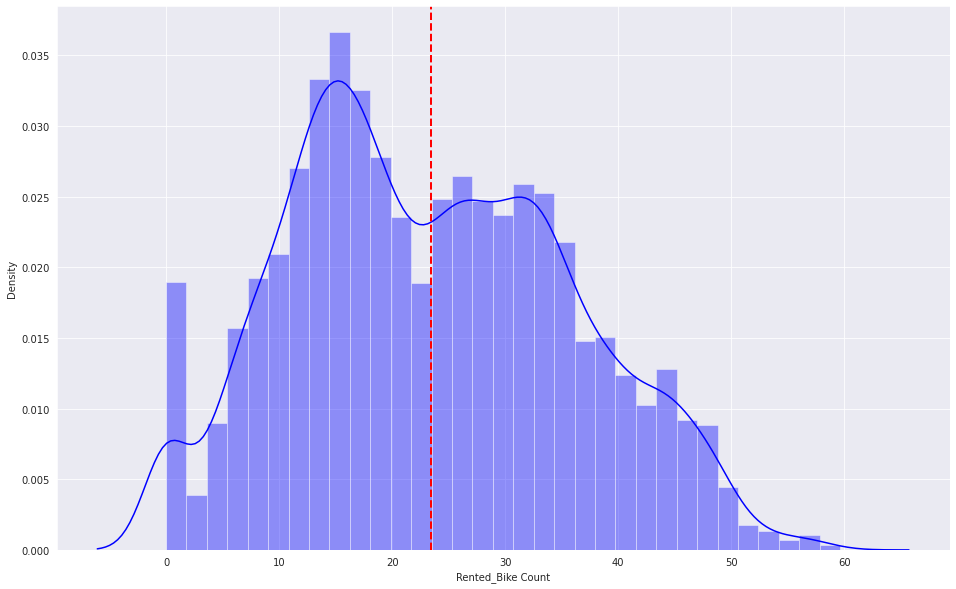

In [196]:
# Chart - 3 visualization code
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(16,10))
ax=sns.distplot(np.sqrt(df['rented_bike_count']), color="blue")
ax.axvline(np.sqrt(df['rented_bike_count']).mean(), linestyle='dashed', color='red', linewidth=2)
plt.xlabel('Rented_Bike Count')
plt.ylabel('Density')

##### 1. Why did you pick the specific chart?

We chose this graph to determine whether or not we now have a normal distribution.

##### 2. What is/are the insight(s) found from the chart?

We obtain an almost normal distribution after applying the square root to the skewed Rented Bike Count. As a result, we may perform the square root transformation during modelling.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Exploring Numerical features



###Numeric features

In [197]:
# features which are continuous variable
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature not in [ 'month', 'year','date' , 'weekday'] ]
numerical_features 

['rented_bike_count',
 'hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

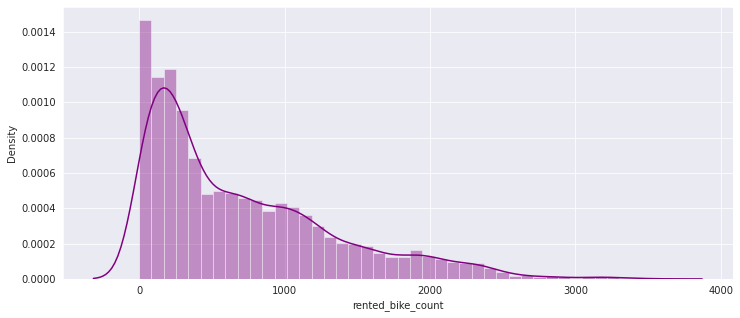

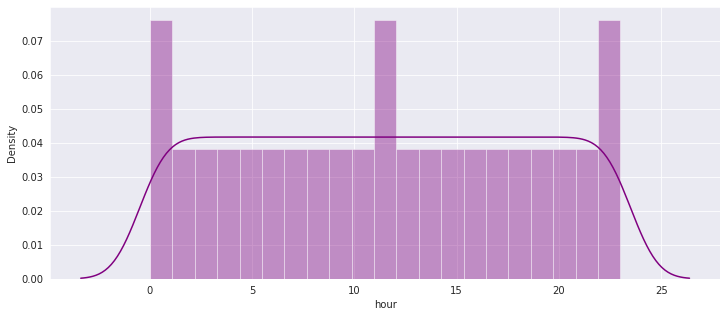

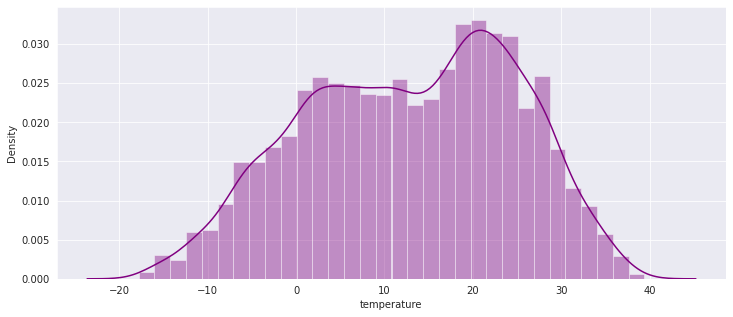

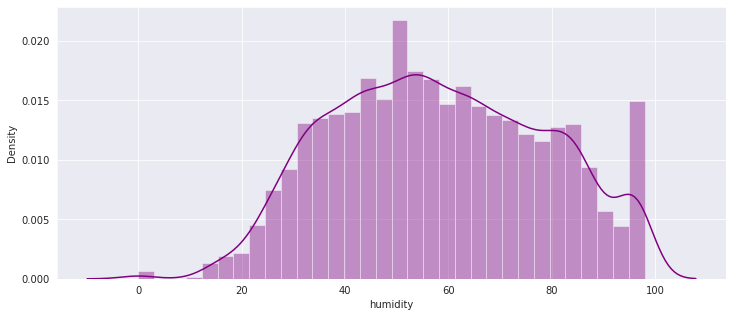

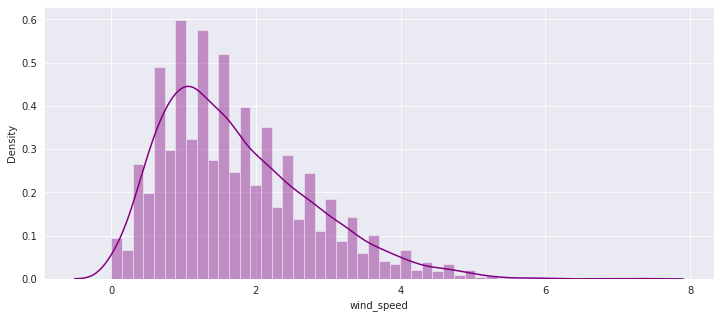

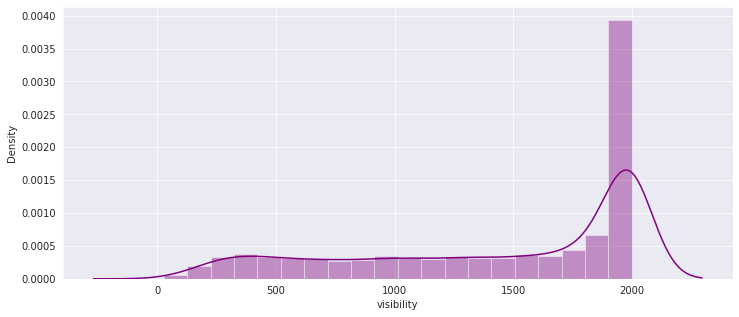

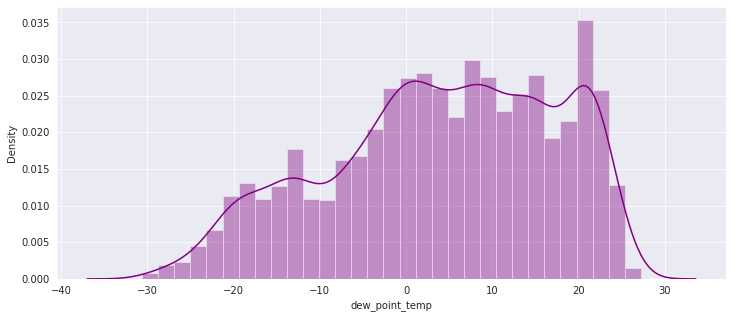

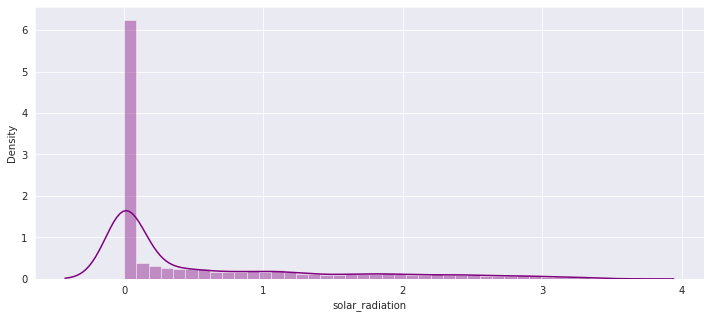

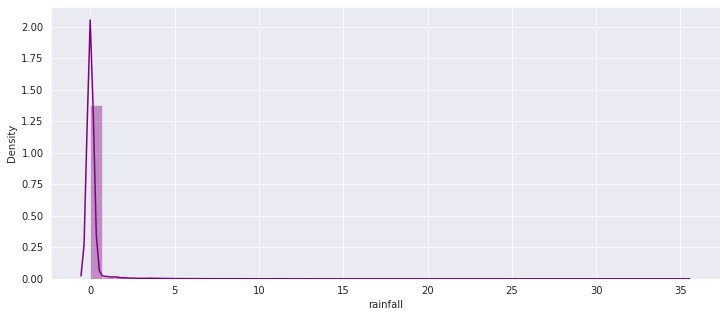

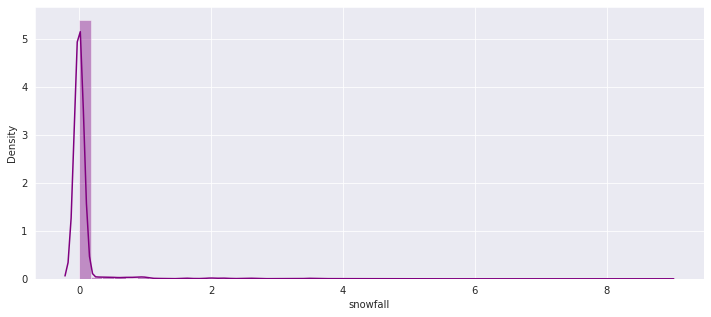

In [198]:
# Chart - 4 visualization code
#With displot, examine the distribution of each numerical feature.
for num in numerical_features :
  plt.figure(figsize=(12,5))
  sns.distplot(x=df[num] ,color="purple" )
  plt.xlabel(num)
  plt.show() 




##### 1. Why did you pick the specific chart?

A distplot chart helps us to examine the density of data and calculate the mean of a data column. When a distribution is skewed, the mean and median become skewed as well. In fact, skewed features can tug on both the mean and median, causing them to lean towards the side of the skewness.

##### 2. What is/are the insight(s) found from the chart?

As we can see from the above displot that Normally distributed attributes: temperature , hour , humidity. Positively skewed attributes: wind, rented bike count , solar_radiation, snowfall, rainfall. Negatively skewed attributes: visibility. , 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing positively and negatively distributed data using a distplot chart can provide valuable insights for businesses. identifying patterns in positively and negatively distributed data can help businesses identify areas for improvement and prioritize resources accordingly. Ultimately, using data visualization tools like distplot can help businesses make data-driven decisions and improve overall performance.





#Bivariate analysis.

Let's strive to determine how numerical variables relate to our dependant variable.

#### Chart - 5 - Regression plot , Numeric feature Vs rented bike count

In [199]:
continuous_variable = [ 'temperature', 'wind_speed','dew_point_temp',  'humidity', 'visibility',  'rainfall', 'snowfall','solar_radiation' ]

In [200]:
rented_bike_count = ['rented_bike_count']

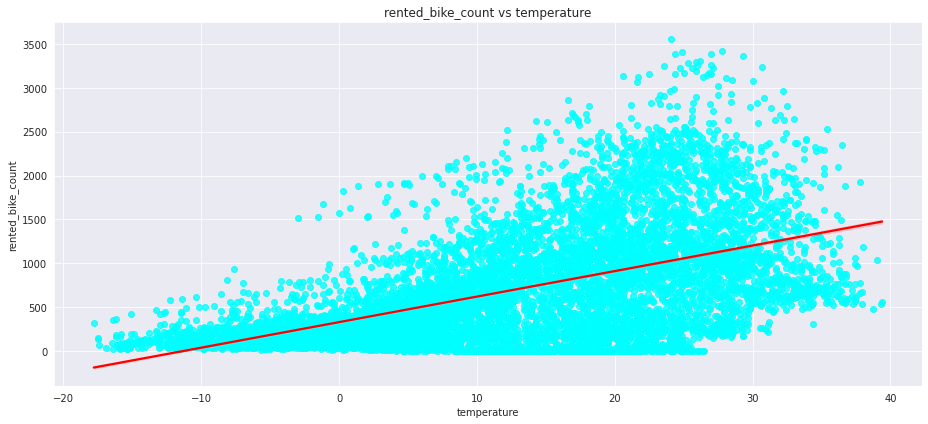

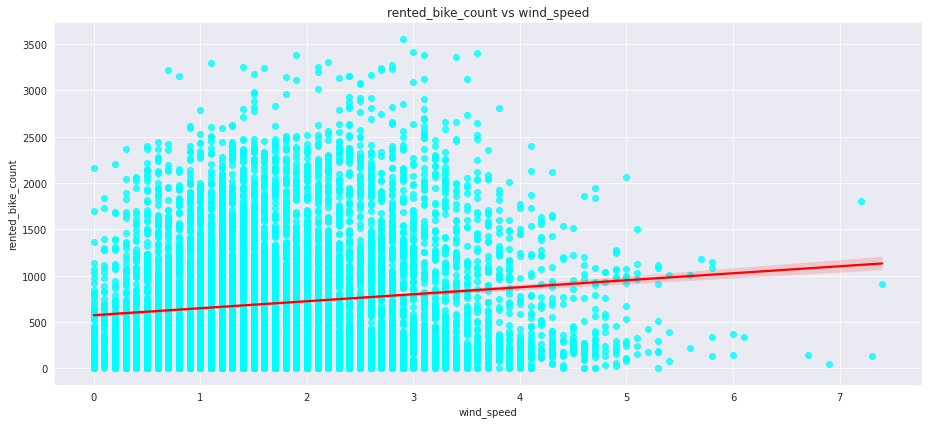

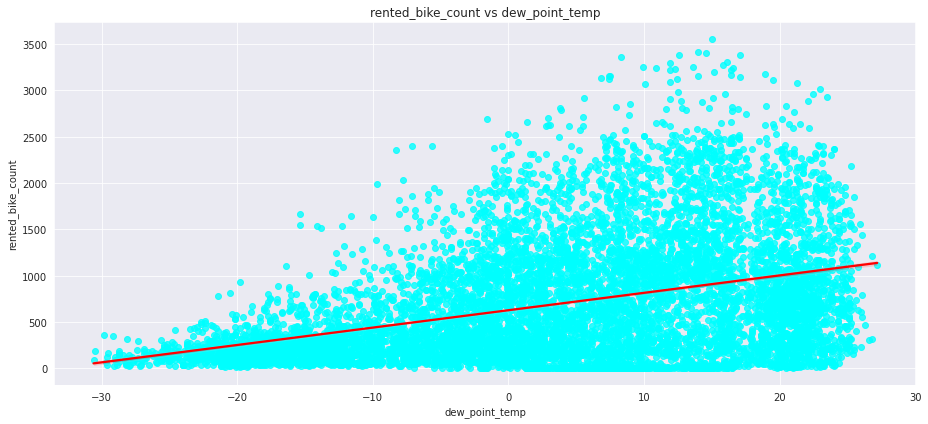

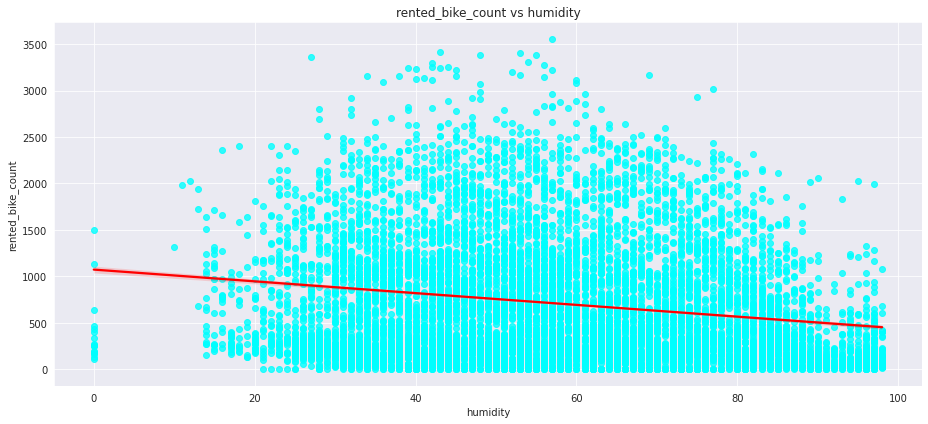

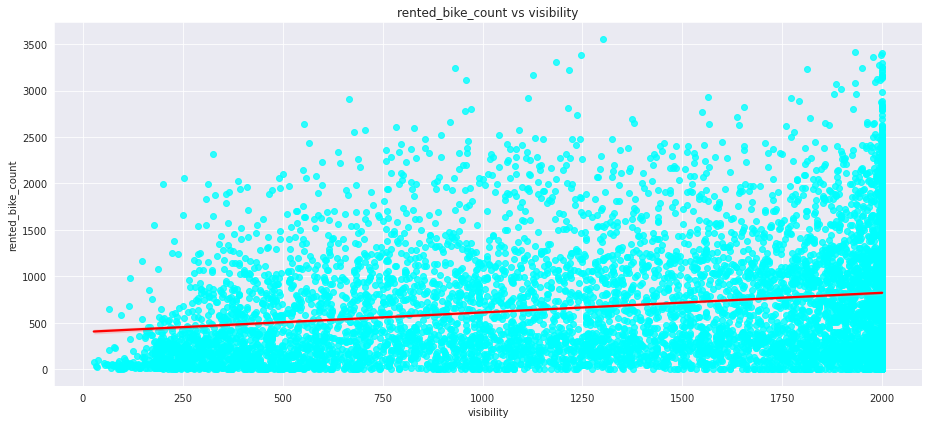

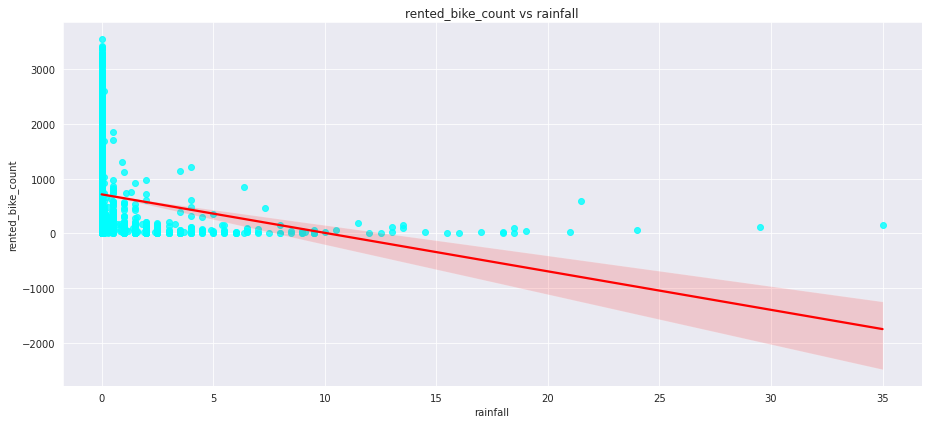

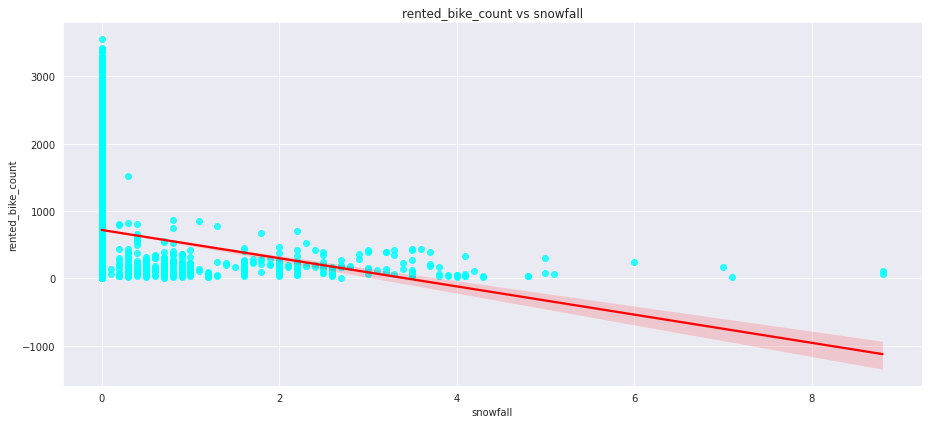

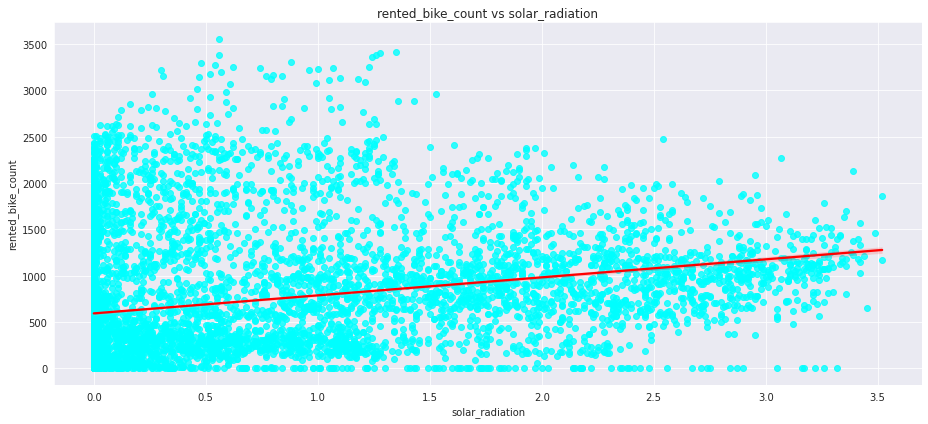

In [201]:
for i in continuous_variable:
  plt.figure(figsize=(13,6))
  sns.regplot(x=df[i], y=df['rented_bike_count'], scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
  plt.title(f'rented_bike_count vs {i}')
  plt.tight_layout()


##### 1. Why did you pick the specific chart?

We have taken this chart up here to identify the relationship between the dependant and independent variables and select the best fit line since a regression plot is an effective visualisation tool for studying the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

**Temperature**: A positive correlation exists between the two. Between 20 and 30 °C, the number of rented bikes is at its peak. It follows that the effects of temperature exist.

**Visibility**: We don't know much about how visibility influences our outcomes, but we do know that it is related with the number of rented bike count.

**Dew point**: To get a relative humidity, air must be cooled to the dew point, which is the temperature it must reach (while maintaining a constant pressure). With the data, it has a positive correlation.

**Wind speed**: The amount of wind has little impact on our data.

**Humidity** : The level of air moisture is known as humidity. Individuals therefore like borrowing bikes when the humidity is lower.

**SnowFall and Rainfall** : Individuals avoid borrowing bikes in locations with snowfall or rain when those conditions exist.

**'Solar_Radiation'** : are positively related to the dependent variable.



* Hour, Temperature, Wind Speed, Visibility, and Solar Radiation are all  positively correlated with the dependant variable. This implies that the number of rented bikes rises as these features do, while the columns "Rainfall," "Snowfall," and "Humidity" are those features that have a negative relationship with the dependent variable, suggesting that the number of rented bikes falls as these features rise.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##**Considering the correlation between the dependent variable and categorical independent variables, Attempting to extract some crucial information from the category feature**

#### Chart - 6  - Year Vs Rented bike count

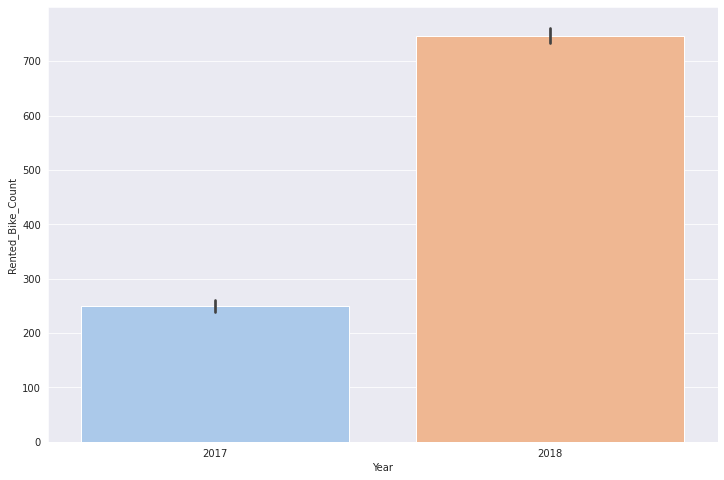

In [202]:
# Chart - 6 visualization code
plt.figure(figsize=(12,8))
sns.barplot(x=df.year,y=df['rented_bike_count'], palette=("pastel"))
plt.xlabel('Year')
plt.ylabel("Rented_Bike_Count")
plt.show()


##### 1. Why did you pick the specific chart?



We have taken this bar plot to check the data contains from which year 



##### 2. What is/are the insight(s) found from the chart?

Our collection primarily includes data from the year 2018 and only a little amount from the year 2017.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Season Vs Rented bike count





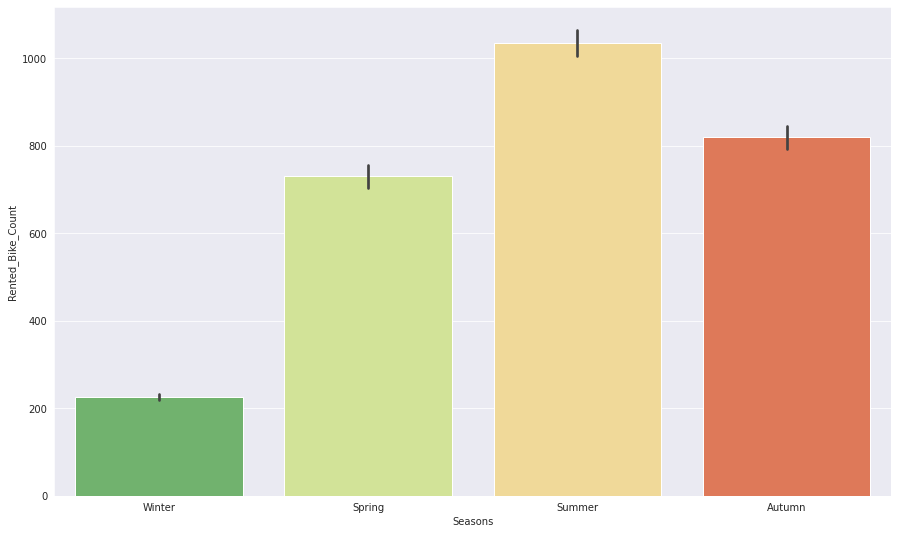

In [203]:
# Chart - 7 visualization code
plt.figure(figsize=(15,9))
sns.barplot(x=df.seasons,y=df['rented_bike_count'],palette=("RdYlGn_r"))
plt.xlabel('Seasons')
plt.ylabel("Rented_Bike_Count")
plt.show()

##### 1. Why did you pick the specific chart?

In order to analyse the data that is divided into four seasons, we have chosen a bar chart to show the number of rented bikes that have been recorded.

##### 2. What is/are the insight(s) found from the chart?

As we can see clearly from the above bar graph,  We have found that average of the rented bike counts is higher during the summer and lowest during the winter.
 it is evident that people enjoy riding bicycles in the summer and the autumn.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the graph, we have unlocked valuable insights that can steer the business towards a positive impact. The data suggests that the demand for bikes follows a seasonal pattern, with a peak in the Summer months, followed by a  Autumn, a refreshing Spring, and a chilly Winter. Based on this knowledge, we can strategically plan and maximize our profits during the summer , Autum and spring seasons, while also devising innovative ways to tackle the off-season. 

#### Chart - 8 - Month Vs Rented bike count

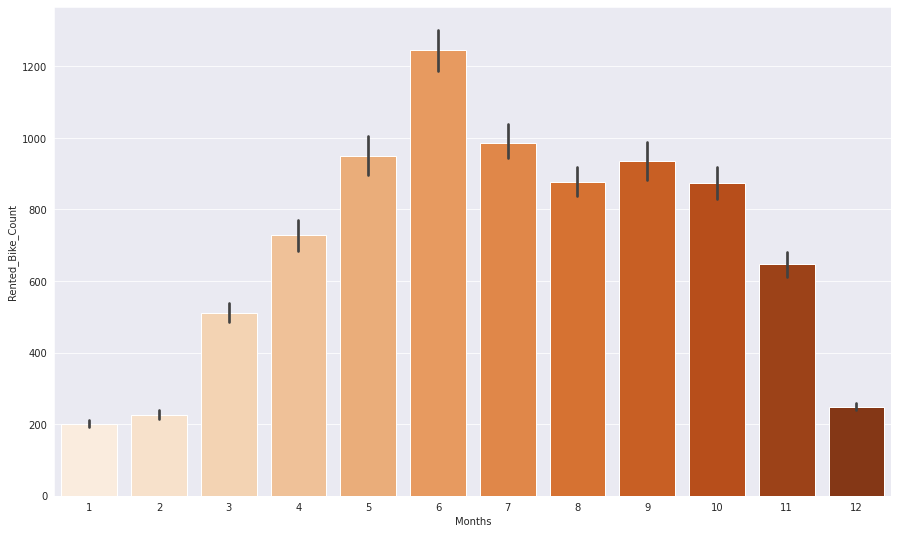

In [204]:
# Chart - 8 visualization code
plt.figure(figsize=(15,9))
sns.barplot(x=df.month,y=df['rented_bike_count'],palette=("Oranges"))
plt.xlabel('Months')
plt.ylabel("Rented_Bike_Count")
plt.show()

##### 1. Why did you pick the specific chart?

There We have created a bar plot to analyse the quantity of bikes that are rented. We can clearly see from the data that this bar plot enables us to determine which month has a higher demand for rented bikes.

##### 2. What is/are the insight(s) found from the chart?

We can observe that the months of December, January, and February—the winter seasons—have lower demand for rented bikes than those months, as well as May, June, and July—the summer seasons—which have the highest demand for bikes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Through careful analysis of the graph, we have uncovered valuable insights that can help us generate a positive impact on our business. It is evident that the demand for bikes fluctuates on a monthly basis, indicating the importance of seasonality in our business planning. Upon closer examination, we can observe that the demand for bikes is at its peak during the scorching months of May, June, and July, while remaining moderate during the months of March, April, August, September, and November. Conversely, the demand for bikes is at its lowest during the colder months of January, February, and December. Armed with this knowledge, we can make informed decisions and tailor our strategies to optimize profits during peak months while developing innovative approaches to tackle the low-demand months. So let's pedal towards prosperity!

#### Chart - 9 - Week_Day Vs rented bike count

In [205]:
df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'year', 'month',
       'weekday'],
      dtype='object')

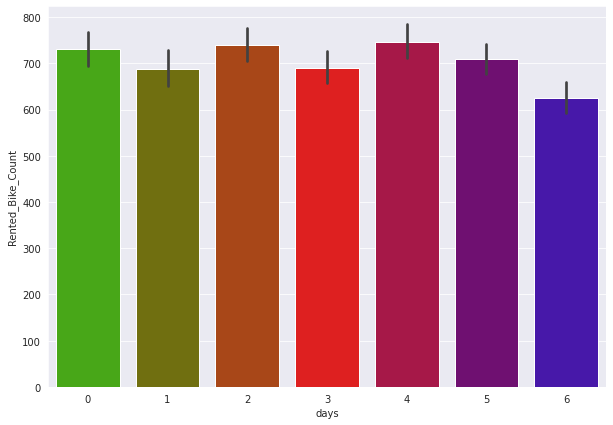

In [206]:
# Chart - 9 visualization code
plt.figure(figsize=(10,7))
sns.barplot(x=df.weekday,y=df['rented_bike_count'],palette=("brg_r") )
plt.xlabel('days')
plt.ylabel("Rented_Bike_Count")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is used when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data

There, we used a bar plot to determine which day of the week has the highest demand for rental bikes.

##### 2. What is/are the insight(s) found from the chart?


As we can see from the above graph the , all days, rented bike count is consistant and equal

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10- holiday, No holiday

In [207]:
# View the frequency count of 'holiday' column
holiday_counts = df['holiday'].value_counts()
holiday_counts

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

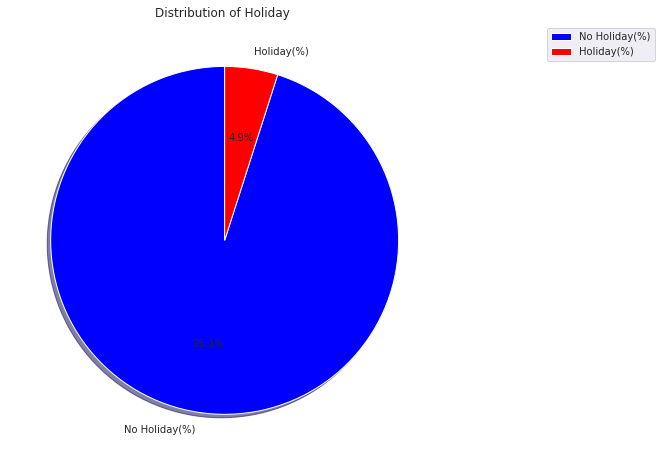

In [208]:
# Chart - 10 visualization code
# Generate a pie chart to visualize the distribution
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
plt.pie(holiday_counts, 
        autopct="%1.1f%%",
        startangle=90,
        shadow=True,
        labels=['No Holiday(%)','Holiday(%)'],
        colors=['blue','red'],
        explode=[0,0])
plt.title('Distribution of Holiday ')
ax.legend(bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. When comparing different percentages, pie charts are widely utilised. I thus utilised a pie chart, which enabled me to compare the variable's percentages.

##### 2. What is/are the insight(s) found from the chart?

By analyzing the pie chart, I am able to see the valuable insights about the distribution of the 'holiday' column in my dataset. The chart revealed that the majority of the ratings - a whopping 95.1% or 8,328 records - were on non-holiday days. In contrast, the number of ratings received during holidays was relatively low, accounting for only 4.9% or 432 records of the total rented bike count data available in the dataset. These findings highlight the importance of considering external factors, such as holidays, when analyzing data, as they can have a significant impact on the trends and patterns observed in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

we can analyze that the demand for rented bikes is significantly higher on non-holiday days than on holidays. This crucial insight can have a profound impact on business decisions, as it implies that the rental bike business is poised for significant growth during non-holiday periods. On the other hand, the data reveals that the demand for rented bikes during holidays is negligible, indicating a negative growth trend for the business during these times.

#### Chart - 11 - Average rented bikes per hour

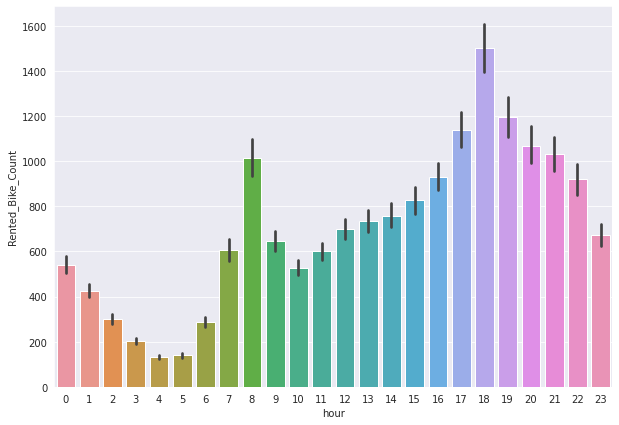

In [209]:
# Chart - 11 visualization code
plt.figure(figsize=(10,7))
sns.barplot(x=df.hour,y=df['rented_bike_count'])
plt.xlabel('hour')
plt.ylabel("Rented_Bike_Count")
plt.show()

##### 1. Why did you pick the specific chart?

we have picked this bar chart to analyze the demand of rented bike per hour 

##### 2. What is/are the insight(s) found from the chart?

People favour rented bikes during rush hour, as evidenced by the high surge in hired bikes from 8:00 am to 9:00 pm. We may state that during business opening and closing times there is a significantly high demand because it is apparent that demand increases most at 8 a.m. and 6:00 p.m.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 These findings provide valuable insights into the usage patterns of rented bikes, suggesting that businesses should focus their marketing efforts on promoting the convenience and affordability of rented bikes during peak hours to capitalize on this trend. By doing so, businesses can enhance their profitability and better cater to the needs of their customers.

#### Chart - 12 - Functioning Day and Non Functional day

In [210]:
df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'year', 'month',
       'weekday'],
      dtype='object')

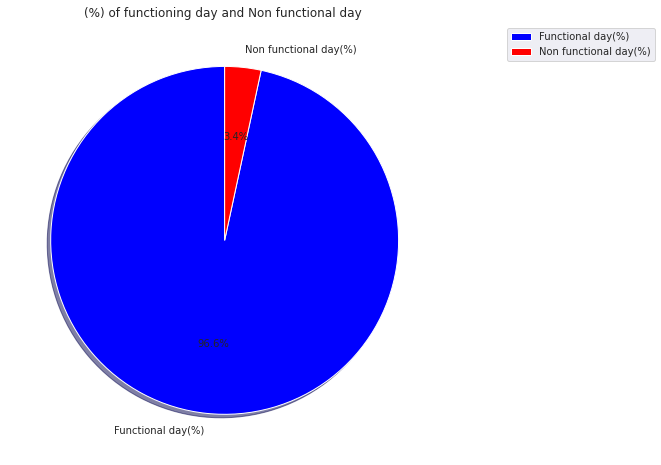

In [211]:
# Chart - 12 visualization code
# Generate a pie chart to visualize the distribution
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
plt.pie(df['functioning_day'].value_counts(), 
        autopct="%1.1f%%",
        startangle=90,
        shadow=True,
        labels=['Functional day(%)','Non functional day(%)'],
        colors=['blue','red'],
        explode=[0,0])
plt.title('(%) of functioning day and Non functional day ')
ax.legend(bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. When comparing different percentages, pie charts are widely utilised. I thus utilised a pie chart, which enabled me to compare the variable's percentages.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart, it can be observed that 96.6% of the dataset consists of non-functional days, while the remaining 3.4% represents weekends. This indicates that there is a significantly higher demand for bikes on functional days compared to weekends, where the demand is relatively low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the chart, we can conclude that functional days are the prime time for bike rentals, with a remarkable surge in demand. However, the weekends exhibit a different story as there is minimal demand for bike rentals. This valuable insight is crucial from a business perspective, as it presents an opportunity to capitalize on the growth potential during functional days and to strategize ways to tackle the decline in demand during non-functional days. In essence, functional days act as a catalyst for business growth, while weekends can pose a challenge to profitability.

###Chart - 13 - Snowfall Vs rented bike count




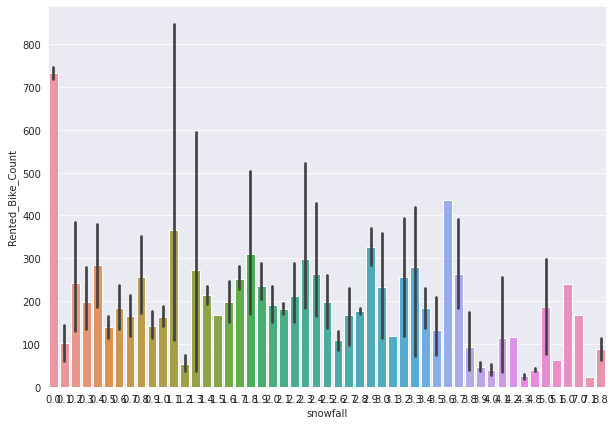

In [212]:
plt.figure(figsize=(10,7))
sns.barplot(x=df.snowfall,y=df['rented_bike_count'])
plt.xlabel('snowfall')
plt.ylabel("Rented_Bike_Count")
plt.show()

##### 1. Why did you pick the specific chart?

In order to examine the provided data, we have chosen a bar chart to show the relationship between the number of rented bikes and the amount of snowfall.

##### 2. What is/are the insight(s) found from the chart?

We can observe a decline in demand for rented bikes when snow falls.

##### 3. Will the gained insights help creating a positive business impact? 


Are there any insights that lead to negative growth? Justify with specific reason.


The analysis of the graph suggests that snowfall has a significant impact on the demand for rented bikes, resulting in a considerable decrease. This decrease in demand, if not accounted for, can have a negative impact on the business. Therefore, it is crucial for businesses to be aware of the weather conditions and adjust their strategies accordingly to optimize growth potential and ensure the smooth running of operations.

##In order to represent the number of rented bikes across several categorical parameters with regard to hour, we create point plots.

#### Chart - 14 Average Bike Rented_per hour

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23')]

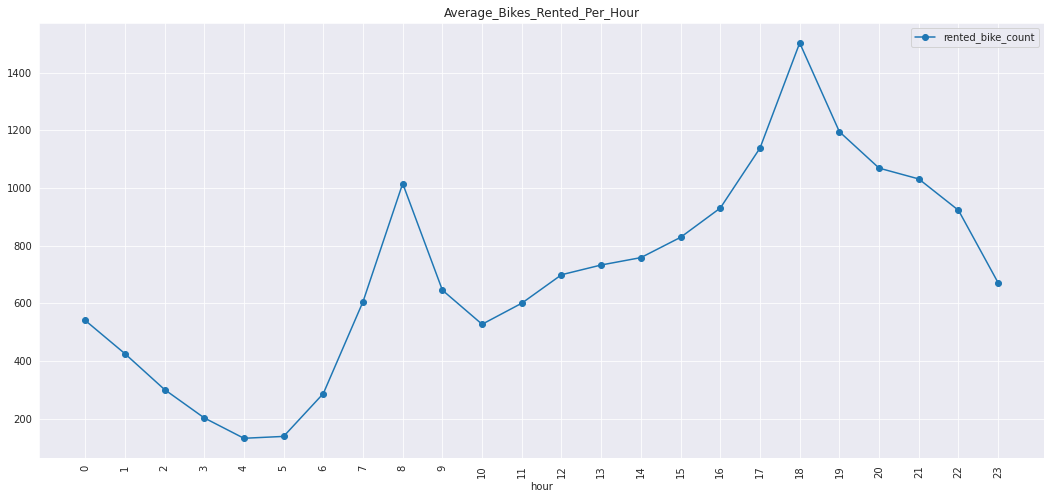

In [213]:
# Chart - 13 visualization code
fig,ax=plt.subplots(figsize=(18,8))
Average_Rent_hours =df.groupby('hour')['rented_bike_count'].mean()
ax=Average_Rent_hours.plot(legend=True, marker='o', title="Average_Bikes_Rented_Per_Hour")
ax.set_xticks(range(len(Average_Rent_hours)))
ax.set_xticklabels(Average_Rent_hours.index.tolist(), rotation=90)




##### 1. Why did you pick the specific chart?

we have picked this bar chart to analyze the demand of rented bike per hour 

##### 2. What is/are the insight(s) found from the chart?

By observing the graph, it is clear that there is a sharp increase in the use of rented bikes between the hours of 8:00 a.m. and 9:00 p.m., suggesting that individuals prefer to use rented bikes during peak hours, perhaps for their commute to work. In addition, it can be seen that the demand for rental bikes is greater on non-holiday days than it is on days with holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 This valuable insight is critical from a business perspective, as it highlights the growth potential during non-holiday days, while also underlining the challenge of low demand during holidays.

The peak hours during non-holiday days present a significant opportunity for business growth, whereas holidays can result in a sharp decline in profitability.

###Chart - 15 Average rented bike per day

Text(0.5, 1.0, 'Average Rented bikes per day')

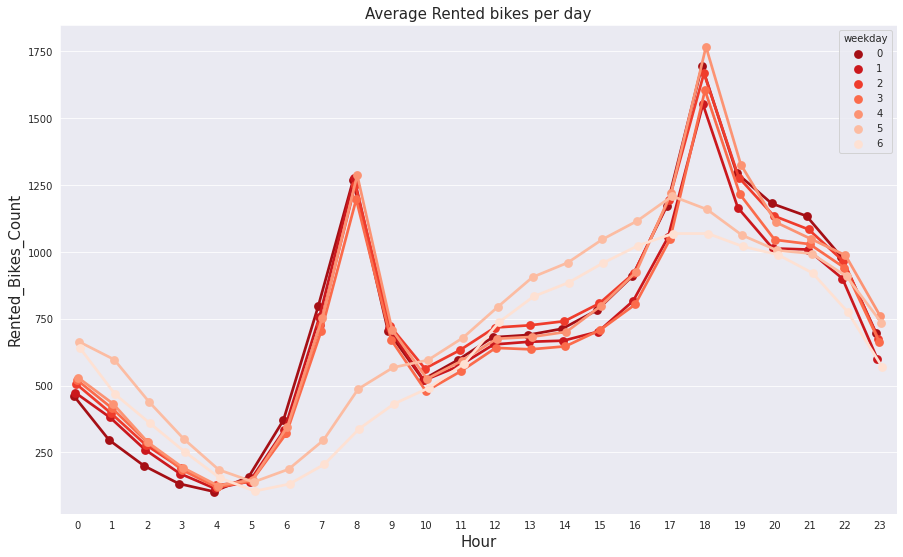

In [214]:
fig, ax = plt.subplots(figsize=(15,9))
sns.pointplot(data=df,x='hour',y='rented_bike_count', palette=("Reds_r"),hue='weekday' , dodge=True, ci= None)
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Rented_Bikes_Count',fontsize=15)
ax.set_title('Average Rented bikes per day' , fontsize=15)

##### 1. Why did you pick the specific chart?

we have taken this plot to analyze which day has the demand in a week


##### 2. What is/are the insight(s) found from the chart?

By analyzing the Graph, it can be concluded that the average number of rented bikes remains relatively stable from Monday to Saturday. However, there is a noticeable dip in bike rentals on Sundays, and on average, the number of rented bikes is significantly lower on weekends than on weekdays

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This valuable insight presents a unique opportunity for businesses to capitalize on the stable demand for rented bikes during weekdays, while also strategizing ways to overcome the challenge of low demand on weekends.

####Chart - 16 Average Rented Bike Monthly

Text(0.5, 1.0, 'Average Rented bikes monthly')

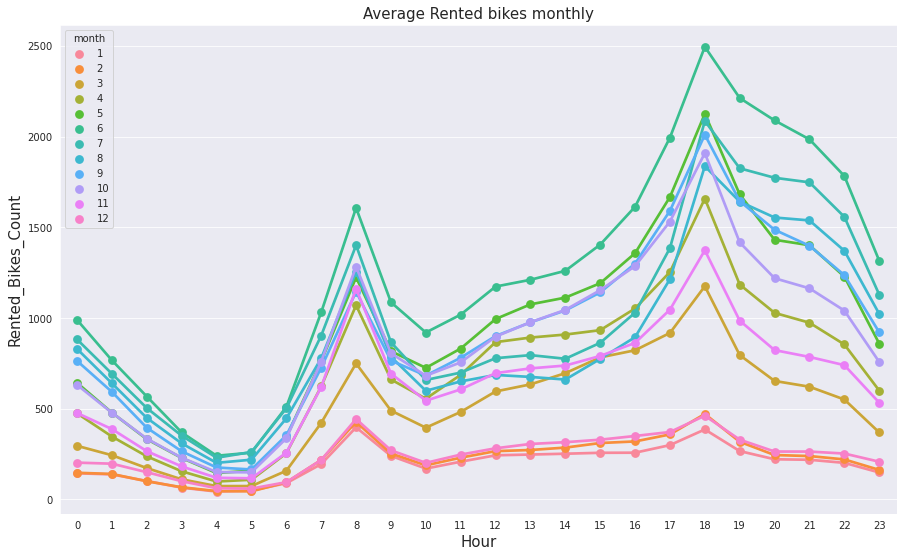

In [215]:
fig, ax = plt.subplots(figsize=(15,9))
sns.pointplot(data=df,x='hour',y='rented_bike_count',hue='month',ci= None, )
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Rented_Bikes_Count',fontsize=15)
ax.set_title('Average Rented bikes monthly' , fontsize=15)

##### 1. Why did you pick the specific chart?

In this analysis, we utilized a line plot to visualize the trends in rented bike count over the hours of the day, specifically focusing on the monthly patterns. Line plots are a popular choice for time-series data visualization, as they represent data points connected by lines, allowing us to observe the changes in data values over time.

##### 2. What is/are the insight(s) found from the chart?

The analysis of the graph reveals that the demand for rented bikes is lower during the winter months, specifically December, January, and February, in contrast to the summer months of May, June, and July, which exhibit the highest demand. Additionally, the graph indicates a significant surge in rented bike usage between 8:00 a.m. and 9:00 p.m., highlighting the preference of individuals to rent bikes during peak hours, likely for their daily commute to work. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help businesses tailor their strategies to maximize the growth potential during the summer months and peak hours, while also overcoming the challenge of lower demand during the winter season.

The peak hours during non-holiday days present a significant opportunity for business growth, whereas holidays can result in a sharp decline in profitability.

####Chart - 17 - Hourly demand of bike based on seasons


Text(0.5, 1.0, 'Hourly demand of Bike based on season')

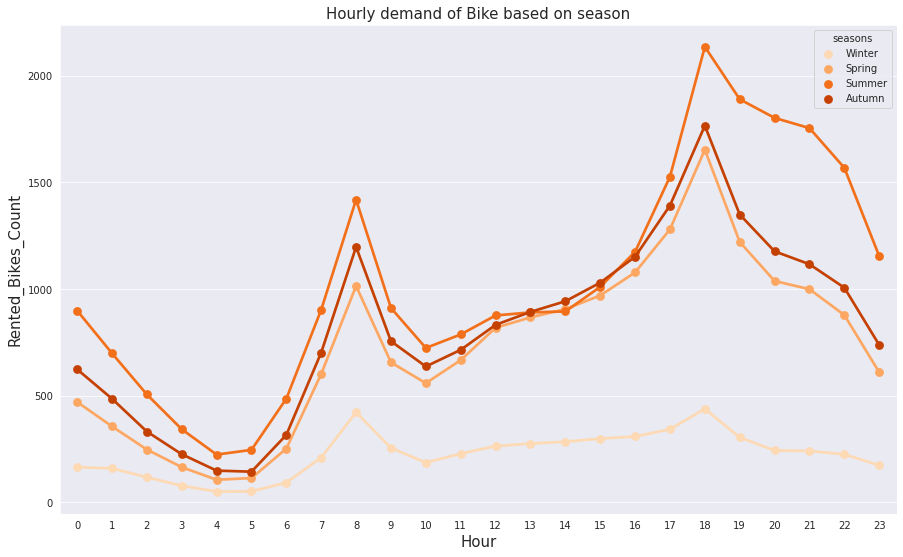

In [216]:
fig, ax = plt.subplots(figsize=(15,9))
sns.pointplot(data=df,x='hour',y='rented_bike_count',hue='seasons', palette=('Oranges'), ci=None )
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Rented_Bikes_Count',fontsize=15)
ax.set_title('Hourly demand of Bike based on season' , fontsize=15)


##### 1. Why did you pick the specific chart?

 Line plots are a popular choice for time-series data visualization, as they represent data points connected by lines, allowing us to observe the changes in data values over time.
 we have plotted this line plot to analyze the hourly demand of rented bike over the seasons 

##### 2. What is/are the insight(s) found from the chart?

Amazingly, it has been shown that during certain seasons, consumers prefer to rent bikes more frequently. Summer is the season with the most and winter is least number of rented bikes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 It is evident from the graph that there is a high demand for rented bikes during the summer months, followed by autumn and spring, and a comparatively lower demand during winter. we can conclude that the business has the potential to yield higher profits during the summer, autumn, and spring months, and comparatively lower profits during winter. By utilizing this information, businesses can develop effective strategies to maximize their profits

##Multivariate Analysis

###Let's examine the heat map's correlation with each numerical feature to learn more about multilinearity.

#### Chart - 18 - Correlation Heatmap

In [217]:
df.corr()['rented_bike_count']

rented_bike_count    1.000000
temperature          0.538558
humidity            -0.199780
wind_speed           0.121108
visibility           0.199280
dew_point_temp       0.379788
solar_radiation      0.261837
rainfall            -0.123074
snowfall            -0.141804
Name: rented_bike_count, dtype: float64

[Text(0.5, 0, 'rented_bike_count'),
 Text(1.5, 0, 'temperature'),
 Text(2.5, 0, 'humidity'),
 Text(3.5, 0, 'wind_speed'),
 Text(4.5, 0, 'visibility'),
 Text(5.5, 0, 'dew_point_temp'),
 Text(6.5, 0, 'solar_radiation'),
 Text(7.5, 0, 'rainfall'),
 Text(8.5, 0, 'snowfall')]

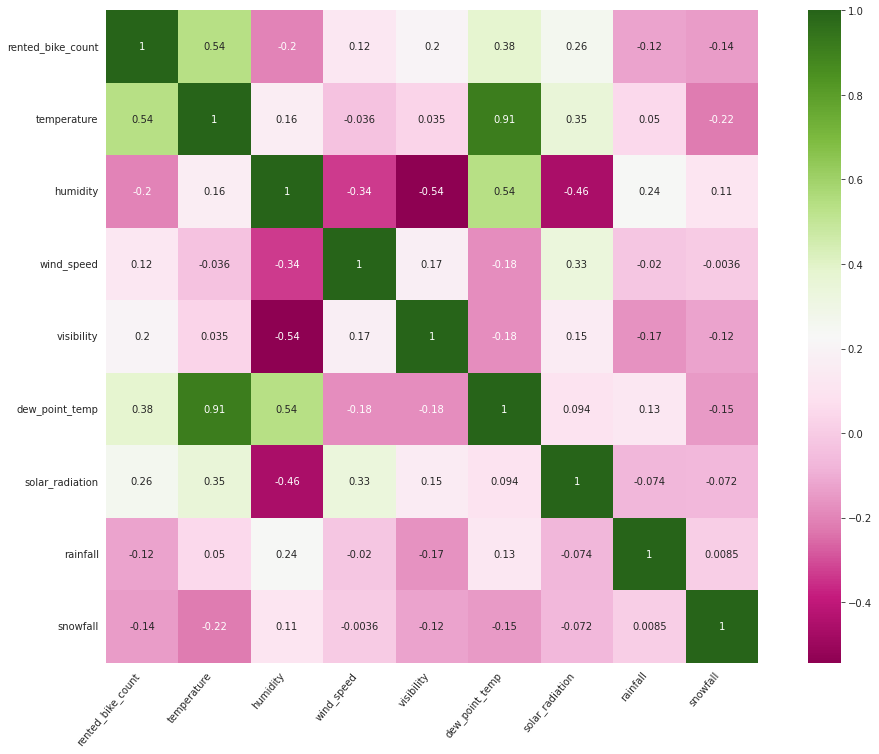

In [218]:
# Correlation Heatmap visualization code
plt.figure(figsize=(18,12))
corr = sns.heatmap(df.corr(),cmap='PiYG', square=True,annot=True)
corr.set_xticklabels(corr.get_xticklabels(),horizontalalignment='right',  rotation=50 )
   

##### 1. Why did you pick the specific chart?

When there are numerous variables or observations for each unit or person, the analysis of the data is referred to be multivariate.


##### 2. What is/are the insight(s) found from the chart?

The temperature(°C) and dew point temperature(°C) columns of this graph demonstrate multicollinearity, as can be seen.

#### Chart - 19 - Pair Plot 

In [219]:
df_ = df.columns

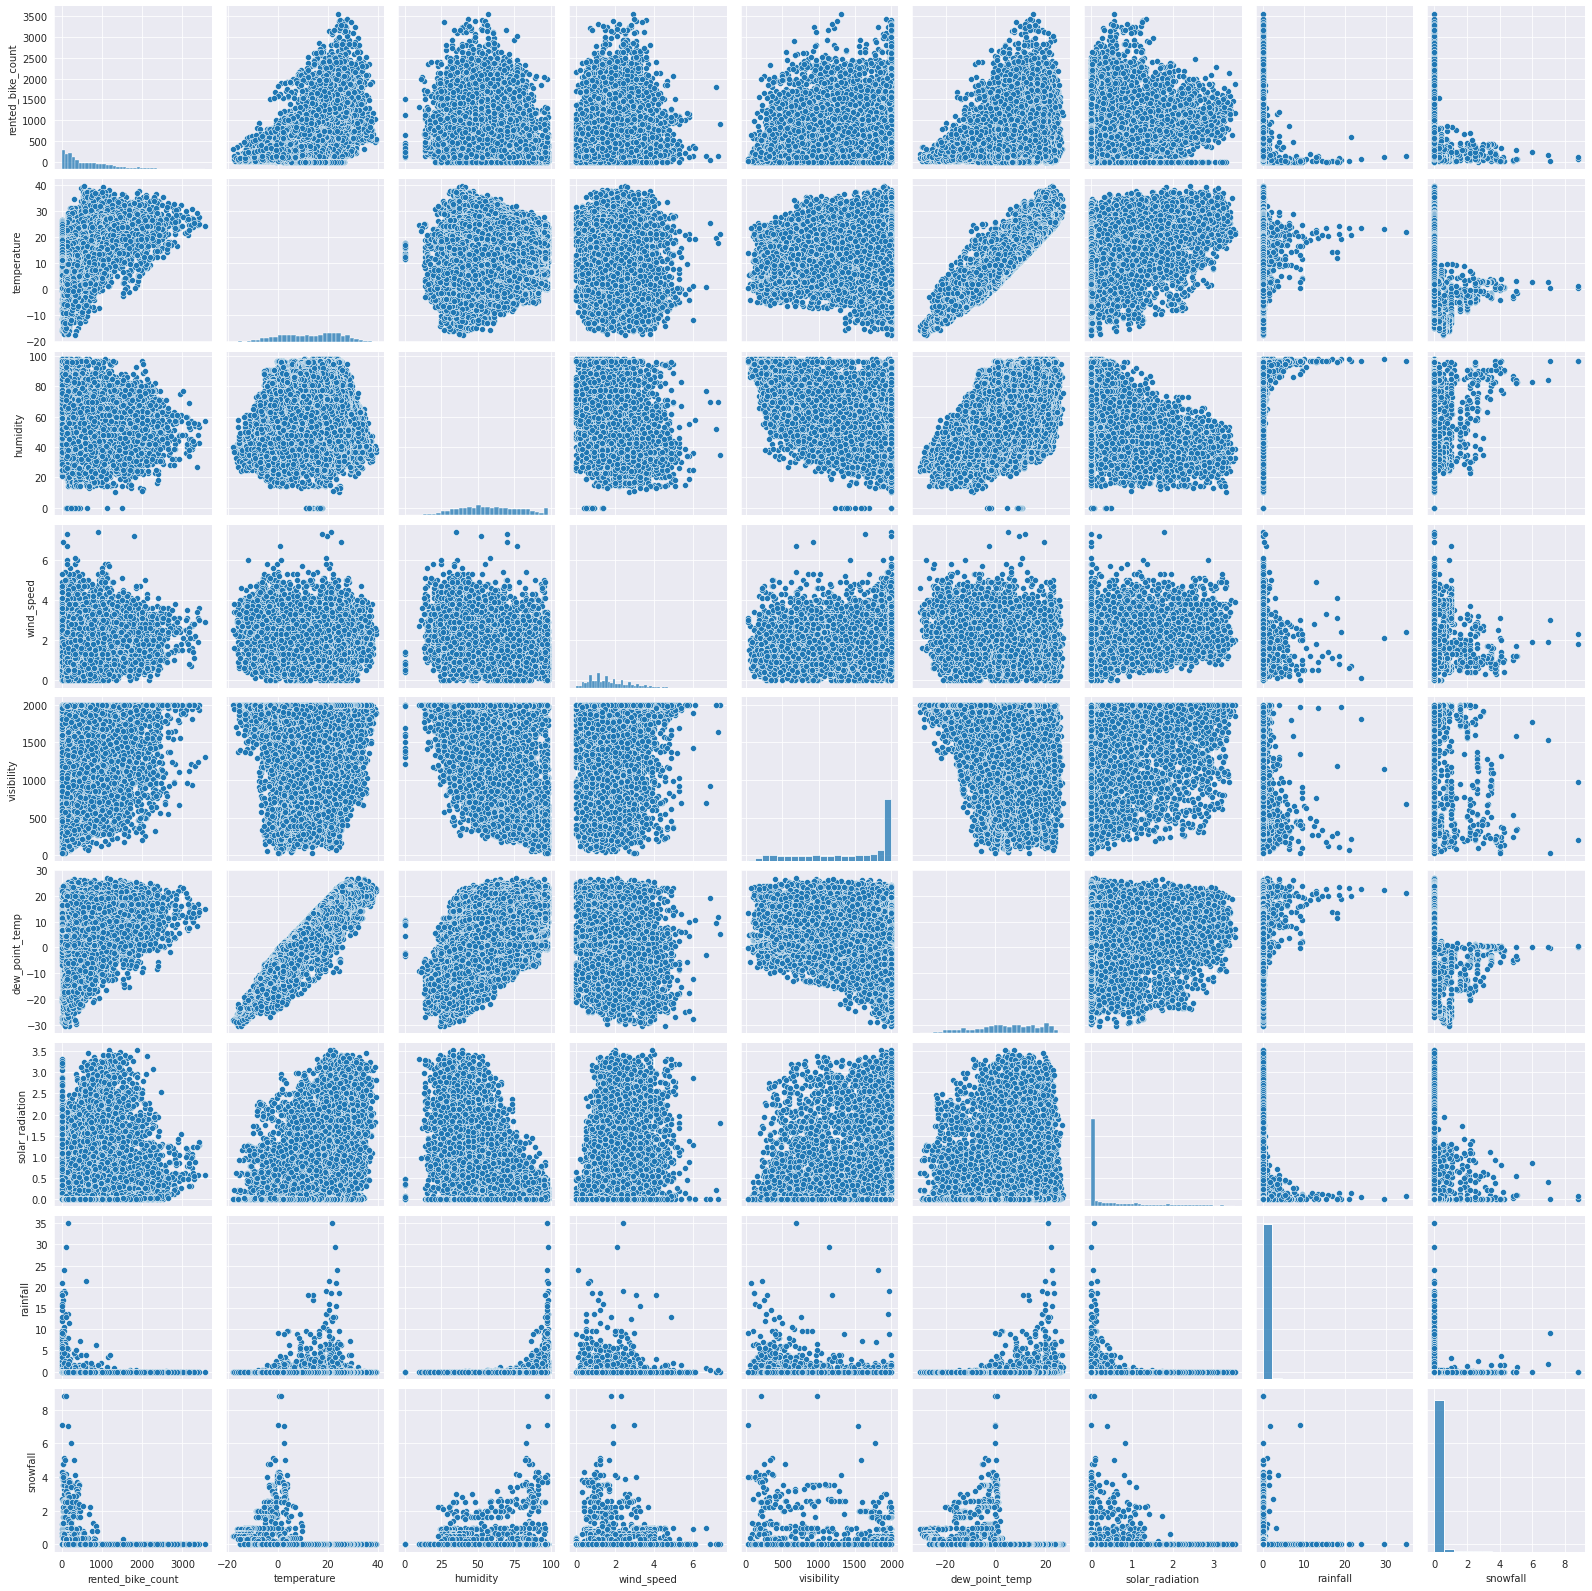

In [220]:
# Pair Plot visualization code
sns.pairplot(df,palette="bright")
plt.show()

##### 1. Why did you pick the specific chart?

I utilised pair plot to analyse data patterns and relationships between features. Pair plot is used to identify the optimal set of features to describe a relationship between two variables or to generate the most isolated clusters.

##### 2. What is/are the insight(s) found from the chart?


The above graph showed less linear correlations between variables and non-linear separability of data points, which was new to me. Hence, we may conclude that both positive and negative trends are present in the relationship between each column in the graph.

In [221]:
df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'year', 'month',
       'weekday'],
      dtype='object')

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1) - **Null Hypothesis** : There is no relation between Wind Speed and Rented Bike Count.

**Alternate Hypothesis** : There is a relationship between Wind Speed and Rented Bike Count

2) **Null Hypothesis** : There is no relation between Temperature and Rented Bike Count.

**Alternate Hypothesis** : There is a relationship between Temperature and Rented Bike Count

3) - **Null Hypothesis** : There is no relation between Holiday and Rented Bike Count.

**Alternate Hypothesis** : There is a relationship between Holiday and Rented Bike Count

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 **Null Hypothesis** - There is no relation between Wind Speed and Rented Bike Count.

**Alternate Hypothesis** - There is a relationship between Wind Speed and Rented Bike Count

#### 2. Perform an appropriate statistical test.

In [222]:
from scipy.stats import pearsonr

def hypothesis_test(x, y, alpha=0.05):
    stat, p = pearsonr(x, y)
    print(f"Correlation coefficient: {stat:.3f}, p-value: {p:.3f}")
    if p > alpha:
        print("Fail to reject the null hypothesis")
    else:
        print("Reject the null hypothesis")

first_sample = df["wind_speed"].head(100)
second_sample = df["rented_bike_count"].head(100)

hypothesis_test(first_sample, second_sample)


Correlation coefficient: 0.134, p-value: 0.184
Fail to reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

**We calculated the P-Value and Pearson Correlation coefficient values using the Pearson Correlation test.**

##### Why did you choose the specific statistical test?

**To identify the connection between the testing series.  Here, we can see that the results of a statistical test comparing wind speed and the number of rented bikes show that the number of rented bikes does not depend on the wind speed, indicating that the two variables have no relationship.**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

2) **Null Hypothesis** : There is no relation between Temperature and Rented Bike Count.

**Alternate Hypothesis** : There is a relationship between Temperature and Rented Bike Count

#### 2. Perform an appropriate statistical test.

In [223]:
# Perform Statistical Test to obtain P-Value

def hypothesis_test(x, y, alpha=0.05):
    stat, p = pearsonr(x, y)
    print(f"Correlation coefficient: {stat:.3f}, p-value: {p:.3f}")
    if p > alpha:
        print("Fail to reject the null hypothesis")
    else:
        print("Reject the null hypothesis")

first_sample = df["temperature"].head(100)
second_sample = df["rented_bike_count"].head(100)

hypothesis_test(first_sample, second_sample)



Correlation coefficient: 0.216, p-value: 0.031
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

**We calculated the P-Value and Pearson Correlation coefficient values using the Pearson Correlation test.**


##### Why did you choose the specific statistical test?

**To identify the connection between the testing series.  Here, we can see that the results of a statistical test comparing temperature and the number of rented bikes show that the number of rented bikes depend on the temperature, indicating that the two variables are correlated.**

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** : There is no relation between Holiday and Rented Bike Count.

**Alternate Hypothesis** : There is a relationship between Holiday and Rented Bike Count

#### 2. Perform an appropriate statistical test.

In [224]:
# Perform Statistical Test to obtain P-Value

def hypothesis_test(x, y, alpha=0.05):
    stat, p = pearsonr(x, y)
    print(f"Correlation coefficient: {stat:.3f}, p-value: {p:.3f}")
    if p > alpha:
        print("Fail to reject the null hypothesis")
    else:
        print("Reject the null hypothesis")

first_sample = df["holiday"].head(100)
second_sample = df["rented_bike_count"].head(100)

hypothesis_test(first_sample, second_sample)



Correlation coefficient: nan, p-value: nan
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

**We calculated the P-Value and Pearson Correlation coefficient values using the Pearson Correlation test.**

##### Why did you choose the specific statistical test?

**To identify the connection between the testing series.  Here, we can see that the results of a statistical test comparing holiday and the number of rented bikes show that the number of rented bikes depend on the holiday, indicating that the two variables are correlated.**


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [225]:
df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'year', 'month',
       'weekday'],
      dtype='object')

In [226]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()


rented_bike_count    0
hour                 0
temperature          0
humidity             0
wind_speed           0
visibility           0
dew_point_temp       0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
functioning_day      0
year                 0
month                0
weekday              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As null values have previously been handled with, our dataset is complete and free of duplicate, missing, or null values.

### 2. Handling Outliers

###Let's use the IQR method to create a function for the outlier treatment, capping the outliers in the 25–75 percentile.

In [227]:
df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'year', 'month',
       'weekday'],
      dtype='object')

In [228]:
print("Numeric_features: ",continuous_variable)
print("Categorical_features: ",categorical_features)

Numeric_features:  ['temperature', 'wind_speed', 'dew_point_temp', 'humidity', 'visibility', 'rainfall', 'snowfall', 'solar_radiation']
Categorical_features:  ['hour', 'seasons', 'holiday', 'functioning_day', 'month', 'weekday', 'year']


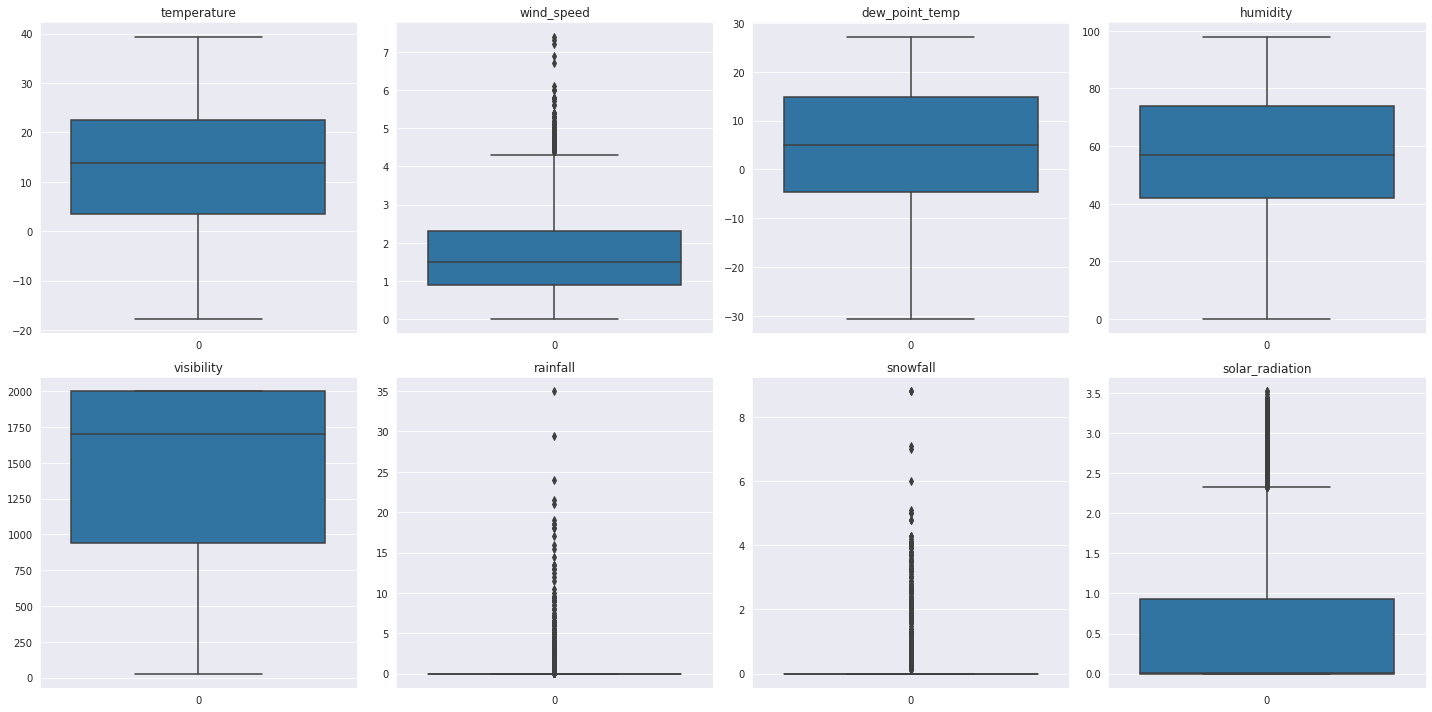

In [229]:
# Handling Outliers & Outlier treatment
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
for i, ax in zip(continuous_variable, axes.flatten()):
    sns.boxplot(df[i], ax=ax)
    ax.set_title(i)
plt.tight_layout()


**We can easily see from the box plots above that the variables "wind speed," "rainfall," "snowfall," and "solar radiation" have a number of outliers, whereas the other features are good because they are Numeric in nature.**

**Let's build a function to determine the percentage and quantity of outliers present in each feature so that we can manage them appropriately.**

In [230]:
##using IQR to define the code for outlier detection and percentage.
def detect_outliers(bike_df):
    data = sorted(bike_df)
    q1, q2, q3 = np.percentile(data, [25, 50, 75])
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5*IQR, q3 + 1.5*IQR
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}, IQR: {IQR}")
    

    outliers = [i for i in data if i < lower_bound or i > upper_bound]
    num_outliers = len(outliers)
    perc_outliers = round(num_outliers * 100 / len(data), 2)
    print(f"Total number of outliers are: {num_outliers}")
    print(f"Total percentage of outlier is: {round(perc_outliers*100/len(data),2)} %")
    

    results = (
        q1, q2, q3,
        IQR,
        lower_bound, upper_bound,
        outliers,
        num_outliers,
        perc_outliers
    )
    return results




In [231]:
#Finding the IQR, lower and upper bounds, and counting the number of outliers present in each continuous numerical feature
for feature in continuous_variable:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

temperature :
q1:3.5, q2:13.7, q3:22.5
Lower bound: -25.0, Upper bound: 51.0, IQR: 19.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


wind_speed :
q1:0.9, q2:1.5, q3:2.3
Lower bound: -1.1999999999999997, Upper bound: 4.3999999999999995, IQR: 1.4
Total number of outliers are: 161
Total percentage of outlier is: 0.02 %


dew_point_temp :
q1:-4.7, q2:5.1, q3:14.8
Lower bound: -33.95, Upper bound: 44.05, IQR: 19.5
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


humidity :
q1:42.0, q2:57.0, q3:74.0
Lower bound: -6.0, Upper bound: 122.0, IQR: 32.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


visibility :
q1:940.0, q2:1698.0, q3:2000.0
Lower bound: -650.0, Upper bound: 3590.0, IQR: 1060.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


rainfall :
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 528
Total percentage of outlier is: 0.07 %


snowfa

In [232]:
## Using the IQR technique to define the function that treat outliers
def treat_outliers_iqr(data):
    # Sort the data in ascending order
    sorted_data = sorted(data)
    
    # Calculate the quartile indices
    q1_index = int(len(sorted_data) * 0.25)
    q2_index = int(len(sorted_data) * 0.5)
    q3_index = int(len(sorted_data) * 0.75)
    
    
    # Calculate the quartile values
    q1 = sorted_data[q1_index]
    q2 = sorted_data[q2_index]
    q3 = sorted_data[q3_index]
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int


In [233]:
##Using the function we defined previously to treat outliers, passing each feature one by one from the continuous value feature list.
for treat in continuous_variable:
  df[treat]= treat_outliers_iqr(df[treat])

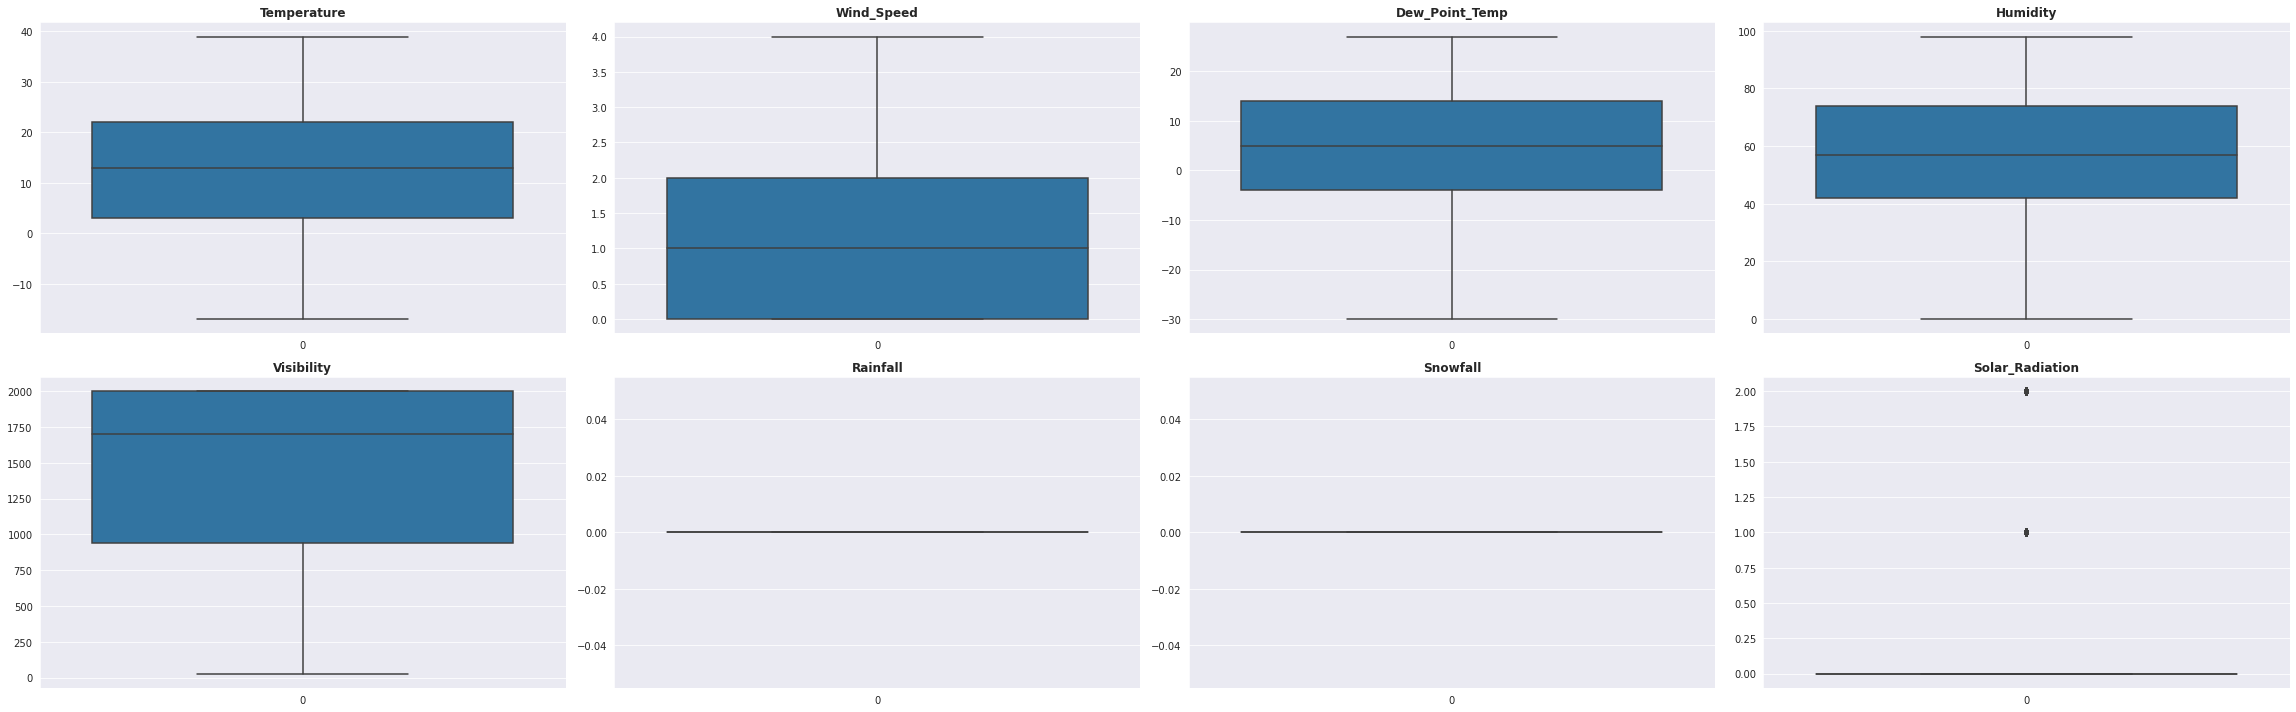

In [234]:
fig, axes = plt.subplots(2, 4, figsize=(32, 10))
for col, ax in zip(continuous_variable, axes.flatten()):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col.title(), weight='bold')
fig.tight_layout()

###Bivariate outlier analysis 

In [235]:
categorical_features = ['hour','seasons', 'holiday', 'functioning_day', 'month', 'weekday', 'year']

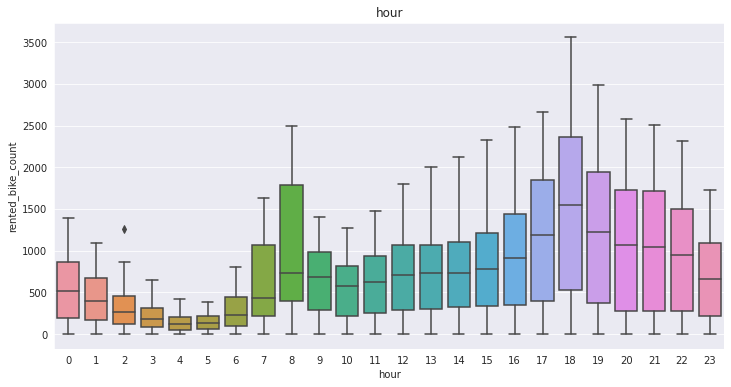

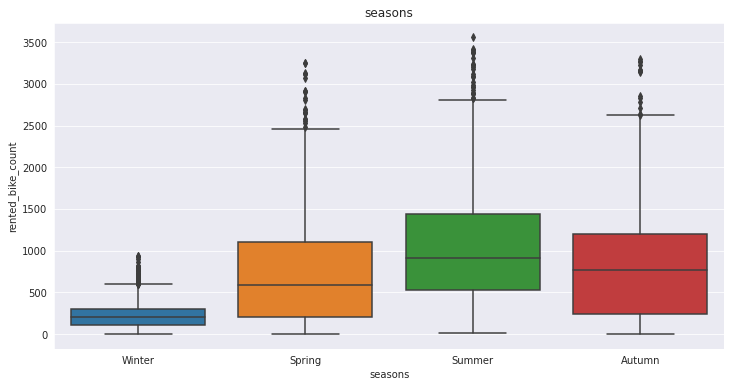

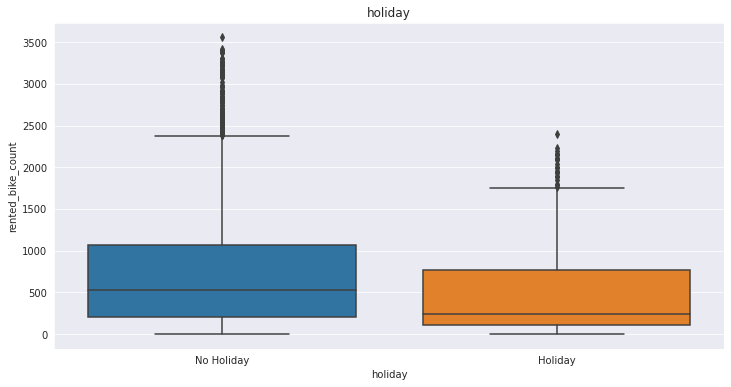

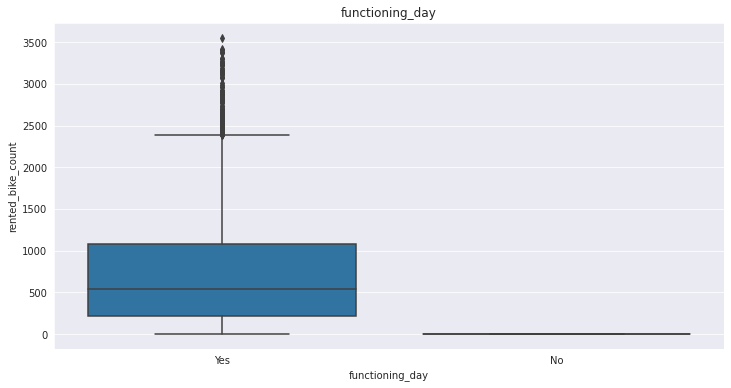

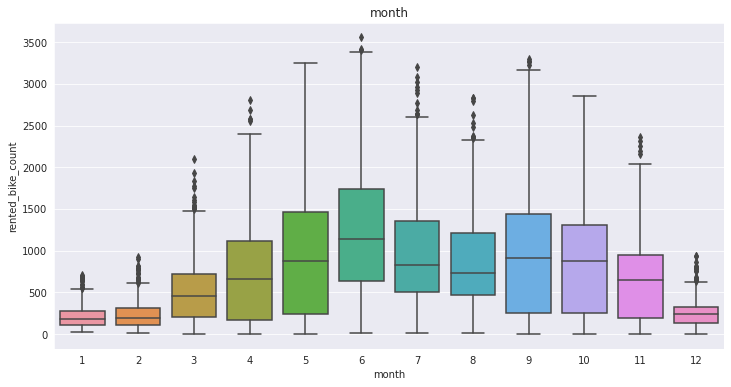

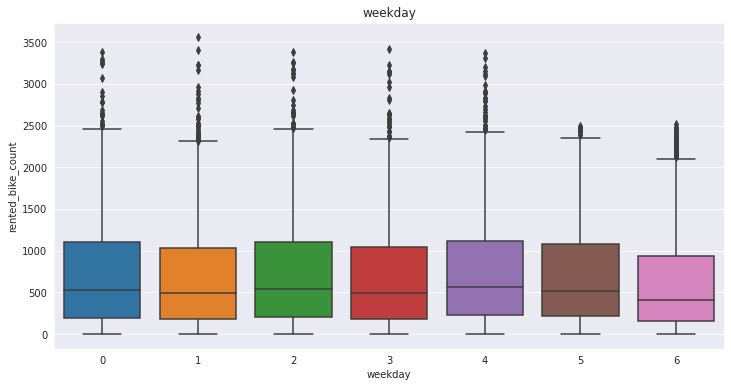

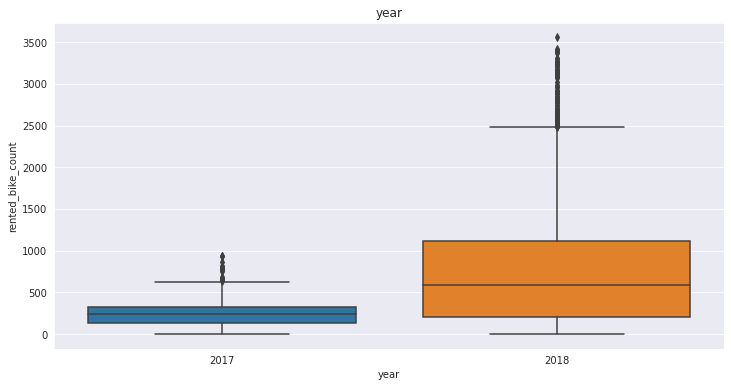

In [236]:
# Checking the outliers present in each categorical_features.
for cat_f in categorical_features:
  plt.figure(figsize=(12,6))
  sns.boxplot(x = cat_f ,y = rented_bike_count[0],data=df, )
  plt.title(cat_f)
  plt.show()

In [237]:
#Finding the IQR, lower and upper bounds, and the number of outliers present in each category of object dtype characteristics
for outlier in categorical_features:
    print(f"Feature: {outlier}")
    cats = df[outlier].unique().tolist()
    for i, (cat, data) in enumerate(df.groupby(outlier)["rented_bike_count"]):
        print(f"{i+1}: Category: {cat}")
        detect_outliers(data)
        print()
        

Feature: hour
1: Category: 0
q1:196.0, q2:513.0, q3:862.0
Lower bound: -803.0, Upper bound: 1861.0, IQR: 666.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %

2: Category: 1
q1:172.0, q2:401.0, q3:669.0
Lower bound: -573.5, Upper bound: 1414.5, IQR: 497.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %

3: Category: 2
q1:122.0, q2:265.0, q3:456.0
Lower bound: -379.0, Upper bound: 957.0, IQR: 334.0
Total number of outliers are: 1
Total percentage of outlier is: 0.07 %

4: Category: 3
q1:79.0, q2:176.0, q3:307.0
Lower bound: -263.0, Upper bound: 649.0, IQR: 228.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %

5: Category: 4
q1:51.0, q2:119.0, q3:199.0
Lower bound: -171.0, Upper bound: 421.0, IQR: 148.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %

6: Category: 5
q1:57.0, q2:129.0, q3:215.0
Lower bound: -180.0, Upper bound: 452.0, IQR: 158.0
Total number of outliers are: 0
Total percentage of out

####Despite the fact that the dataset contains a few categorical outliers, we won't treat them because the ML model and algorithm we'll be using to handle categorical outliers can do so without compromising the accuracy of the model.


##### What all outlier treatment techniques have you used and why did you use those techniques?

Our two distinct functions—one for "outlier detection" and the other for "outlier treatment using IQR"—have been defined, and all observations of continuous characteristics have been run through them. Extreme left outliers (25%) and extreme right outliers (>75%) in the 25th and 75th quartile values have been successfully eliminated.

In [238]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [239]:
calc_vif(df[[i for i in df.describe().columns if i not in ['rented_bike_count','dew_point_temp']]])

variables       VIF
0      temperature  2.380124
1         humidity  3.518772
2       wind_speed  2.561283
3       visibility  3.937645
4  solar_radiation  1.321309
5         rainfall       NaN
6         snowfall       NaN

In [240]:
"""As a result, we may remove the DPT column from the dataset because
   having two variables that are this highly
   correlated won't improve prediction accuracy 
   and will instead make the model more complex."""

df.drop(columns=['dew_point_temp'],inplace=True)

### 3. Categorical Encoding

We have a variety of encoding methods, but the main ones are:



1)- When features are ordinal in nature and have a rank between them, ordinal encoding is used.

2)- When the features are nominal in nature and have equal weight, nominal encoding is used.



We will utilise One-Hot Encoding (Type of Nominal encoding) in our scenario because all of our category columns are nominal in nature:

In [241]:
df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day', 'year', 'month', 'weekday'],
      dtype='object')

In [242]:
df['is_functioning_day'] = (df['functioning_day'] == 'Yes').astype(int)
df['Not functioning_day'] = (df['functioning_day'] == 'No').astype(int)

# Drop the original 'Functioning Day' column
df.drop(columns=['functioning_day'], inplace=True)


In [243]:
# Create a list of the season names
# Encode your categorical columns of Season 
season_names = ['Winter', 'Spring', 'Summer', 'Autumn']

# Loop through the season names and create a new column for each season
for season in season_names:
    df[season] = (df['seasons'] == season).astype(int)

# Drop the original 'Seasons' column
df.drop(columns=['seasons'], inplace=True)


In [244]:
# Encode your categorical columns of Holiday
df['is_holiday '] = np.where(df['holiday']=='holiday',1,0)
df['No holiday'] = np.where(df['holiday']==' No holiday',1,0)

# Drop the 'holiday' column from the dataframe
df.drop(columns=['holiday'],axis=1, inplace=True)

In [245]:
df.head().T

0     1     2     3     4
rented_bike_count     254   204   173   107    78
hour                    0     1     2     3     4
temperature            -5    -5    -6    -6    -6
humidity               37    38    39    40    36
wind_speed              2     0     1     0     2
visibility           2000  2000  2000  2000  2000
solar_radiation         0     0     0     0     0
rainfall                0     0     0     0     0
snowfall                0     0     0     0     0
year                 2017  2017  2017  2017  2017
month                  12    12    12    12    12
weekday                 4     4     4     4     4
is_functioning_day      1     1     1     1     1
Not functioning_day     0     0     0     0     0
Winter                  1     1     1     1     1
Spring                  0     0     0     0     0
Summer                  0     0     0     0     0
Autumn                  0     0     0     0     0
is_holiday              0     0     0     0     0
No holiday              0     0     0     0     0

In [246]:
## Encode your categorical columns of Hour, Month, Weekday and year
category=['hour','month','weekday', 'year']
for col in category:
  df[col]=df[col].astype('category')

In [247]:
#creating dummy variable for ease of operations on categorical features.
df = pd.get_dummies(df,drop_first=True,sparse=True)
df.head().T
     

0     1     2     3     4
rented_bike_count     254   204   173   107    78
temperature            -5    -5    -6    -6    -6
humidity               37    38    39    40    36
wind_speed              2     0     1     0     2
visibility           2000  2000  2000  2000  2000
solar_radiation         0     0     0     0     0
rainfall                0     0     0     0     0
snowfall                0     0     0     0     0
is_functioning_day      1     1     1     1     1
Not functioning_day     0     0     0     0     0
Winter                  1     1     1     1     1
Spring                  0     0     0     0     0
Summer                  0     0     0     0     0
Autumn                  0     0     0     0     0
is_holiday              0     0     0     0     0
No holiday              0     0     0     0     0
hour_1                  0     1     0     0     0
hour_2                  0     0     1     0     0
hour_3                  0     0     0     1     0
hour_4                  0     0     0     0     1
hour_5                  0     0     0     0     0
hour_6                  0     0     0     0     0
hour_7                  0     0     0     0     0
hour_8                  0     0     0     0     0
hour_9                  0     0     0     0     0
hour_10                 0     0     0     0     0
hour_11                 0     0     0     0     0
hour_12                 0     0     0     0     0
hour_13                 0     0     0     0     0
hour_14                 0     0     0     0     0
hour_15                 0     0     0     0     0
hour_16                 0     0     0     0     0
hour_17                 0     0     0     0     0
hour_18                 0     0     0     0     0
hour_19                 0     0     0     0     0
hour_20                 0     0     0     0     0
hour_21                 0     0     0     0     0
hour_22                 0     0     0     0     0
hour_23                 0     0     0     0     0
year_2018               0     0     0     0     0
month_2                 0     0     0     0     0
month_3                 0     0     0     0     0
month_4                 0     0     0     0     0
month_5                 0     0     0     0     0
month_6                 0     0     0     0     0
month_7                 0     0     0     0     0
month_8                 0     0     0     0     0
month_9                 0     0     0     0     0
month_10                0     0     0     0     0
month_11                0     0     0     0     0
month_12                1     1     1     1     1
weekday_1               0     0     0     0     0
weekday_2               0     0     0     0     0
weekday_3               0     0     0     0     0
weekday_4               1     1     1     1     1
weekday_5               0     0     0     0     0
weekday_6               0     0     0     0     0

In [248]:
df.columns

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall',
       'is_functioning_day', 'Not functioning_day', 'Winter', 'Spring',
       'Summer', 'Autumn', 'is_holiday ', 'No holiday', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'year_2018', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [249]:
df.head()

rented_bike_count  temperature  humidity  wind_speed  visibility  \
0                254           -5        37           2        2000   
1                204           -5        38           0        2000   
2                173           -6        39           1        2000   
3                107           -6        40           0        2000   
4                 78           -6        36           2        2000   

   solar_radiation  rainfall  snowfall  is_functioning_day  \
0                0         0         0                   1   
1                0         0         0                   1   
2                0         0         0                   1   
3                0         0         0                   1   
4                0         0         0                   1   

   Not functioning_day  ...  month_9  month_10  month_11  month_12  weekday_1  \
0                    0  ...        0         0         0         1          0   
1                    0  ...        0         0         0         1          0   
2                    0  ...        0         0         0         1          0   
3                    0  ...        0         0         0         1          0   
4                    0  ...        0         0         0         1          0   

   weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0          0          0          1          0          0  
1          0          0          1          0          0  
2          0          0          1          0          0  
3          0          0          1          0          0  
4          0          0          1          0          0  

[5 rows x 57 columns]



#### What all categorical encoding techniques have you used & why did you use those techniques?

- In order to make our categorical object type characteristics suitable to be fed into multiple ML algorithms in the future, we utilized the one-hot encoding technique to convert their dummy into int type.

- Because each of the category features has 3–4 distinct orderless categories (which is less in number). Hence, rather of using an ordinal encoding method, nominal encoding is recommended.


### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [250]:
# Expand Contraction

#### 2. Lower Casing

In [251]:
# Lower Casing

#### 3. Removing Punctuations

In [252]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [253]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [254]:
# Remove Stopwords

In [255]:
# Remove White spaces

#### 6. Rephrase Text

In [256]:
# Rephrase Text

#### 7. Tokenization

In [257]:
# Tokenization

#### 8. Text Normalization

In [258]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [259]:
# POS Taging

#### 10. Text Vectorization

In [260]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [262]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [263]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [264]:
# checking which of the variables are continous in nature
for i in df.columns:
  print(f"The total number of unique counts in {i} is: {df[i].nunique()}")

The total number of unique counts in rented_bike_count is: 2166
The total number of unique counts in temperature is: 57
The total number of unique counts in humidity is: 90
The total number of unique counts in wind_speed is: 5
The total number of unique counts in visibility is: 1789
The total number of unique counts in solar_radiation is: 3
The total number of unique counts in rainfall is: 1
The total number of unique counts in snowfall is: 1
The total number of unique counts in is_functioning_day is: 2
The total number of unique counts in Not functioning_day is: 2
The total number of unique counts in Winter is: 2
The total number of unique counts in Spring is: 2
The total number of unique counts in Summer is: 2
The total number of unique counts in Autumn is: 2
The total number of unique counts in is_holiday  is: 1
The total number of unique counts in No holiday is: 1
The total number of unique counts in hour_1 is: 2
The total number of unique counts in hour_2 is: 2
The total number of

In [265]:
 df.columns

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall',
       'is_functioning_day', 'Not functioning_day', 'Winter', 'Spring',
       'Summer', 'Autumn', 'is_holiday ', 'No holiday', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'year_2018', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [266]:
# Transform Your data
df['rented_bike_count']=np.log1p(df['rented_bike_count'])

### 6. Data Scaling

In [267]:
# Importing StandardScaler and normalize library
from sklearn.preprocessing import StandardScaler
##scaler = StandardScaler()
from sklearn.preprocessing import normalize

In [268]:
# Scaling your data
X = df.drop(columns = ['rented_bike_count'] , axis = 1)
y = df['rented_bike_count']

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [269]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [107]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train , X_test, y_train, y_test =train_test_split(X, y, test_size= 0.2 , random_state =0)

In [108]:

# getting shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape# getting shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 57), (1752, 57), (7008,), (1752,))

In [109]:
std_scalar = StandardScaler()
X_train = std_scalar.fit_transform(X_train)
X_test = std_scalar.transform(X_test)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [110]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [111]:
def regression_metrics(y_train_actual, y_train_pred, y_test_actual, y_test_pred): 
   
    # Calculate mean absolute error for train and test sets
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Print MAE values
    print(f"MAE on train set: {train_mae:.3f}")
    print(f"MAE on test set: {test_mae:.3f}")


     # Calculate mean squared error for train and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Print MSE values
    print(f"MSE on train set: {train_mse:.3f}")
    print(f"MSE on test set: {test_mse:.3f}")


     # Calculate root_mean_squared_error for train and test sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Print RMSE values
    print(f"RMSE on train set: {train_rmse:.3f}")
    print(f"RMSE on test set: {test_rmse:.3f}")


    # Calculate r2_score for train and test sets
    R2_train= r2_score(y_train,y_train_pred)
    R2_test= r2_score(y_test,y_test_pred)
    print("R2 on train set:" ,R2_train)
    print("R2 on test set:" ,R2_test)

    ## Adjusted R2_score
    train_Adj_R2 = (1-(1-r2_score(y_train, y_train_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
    print( 'Adjusted R2 on train is :', train_Adj_R2)
    test_Adj_R2 = (1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
    print( 'Adjusted R2 on test is :', test_Adj_R2)

### ML Model - 1  Linear regression

In [112]:
# ML Model - 1 Implementation
regressor= LinearRegression()

# Fit the Algorithm
regressor.fit(X_train,y_train)


# Predict on the model
y_pred_train_Lr=regressor.predict(X_train)
y_pred_test_Lr=regressor.predict(X_test)
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [113]:
regressor.coef_

array([-3.85098723e-01, -8.27564352e-01, -1.80143970e-02,  7.51361891e-02,
        1.21793926e+00,  3.44140071e-02,  6.27350138e+10,  1.12770084e+12,
        1.90011251e+11,  1.90011251e+11, -2.88948558e+10,  3.78418630e+11,
       -3.41951982e+11,  5.13017622e+11, -1.16696077e+10,  8.21754733e+09,
       -2.86664264e-02, -9.52619564e-02, -1.61139820e-01, -2.22944488e-01,
       -2.08811165e-01, -8.33332617e-02,  3.93228390e-02,  1.10179295e-01,
        1.85648305e-02, -5.52344993e-02, -5.31469584e-02, -4.65507507e-02,
       -4.74853516e-02, -4.49218750e-02, -3.62243652e-02, -1.54266357e-02,
        2.56231874e-02,  1.03174143e-01,  6.85531581e-02,  5.32564319e-02,
        7.14581361e-02,  6.30954351e-02,  1.54249916e-02,  1.01823500e+11,
       -2.74918226e-02, -2.61817950e+11, -2.58793112e+11, -2.60009138e+11,
        1.98141919e+11,  2.00317073e+11,  2.00932323e+11, -3.43511832e+11,
       -3.48331045e+11, -3.47268448e+11,  1.01823500e+11,  4.28464928e-02,
        4.88834383e-02,  

In [114]:
regressor.intercept_

5.903131243546943

In [115]:
regressor.score(X_train, y_train)

0.8298886827786143

In [116]:
print(y_pred_test_Lr)

[5.26426054 6.07859159 5.45340772 ... 5.64382317 6.95367261 6.52715893]


In [117]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_train_Lr,y_test,y_pred_test_Lr)

MAE on train set: 0.440
MAE on test set: 0.432
MSE on train set: 0.416
MSE on test set: 0.405
RMSE on train set: 0.645
RMSE on test set: 0.637
R2 on train set: 0.8298886827786143
R2 on test set: 0.848768186229782
Adjusted R2 on train is : 0.8241647482558168
Adjusted R2 on test is : 0.8436795124488479


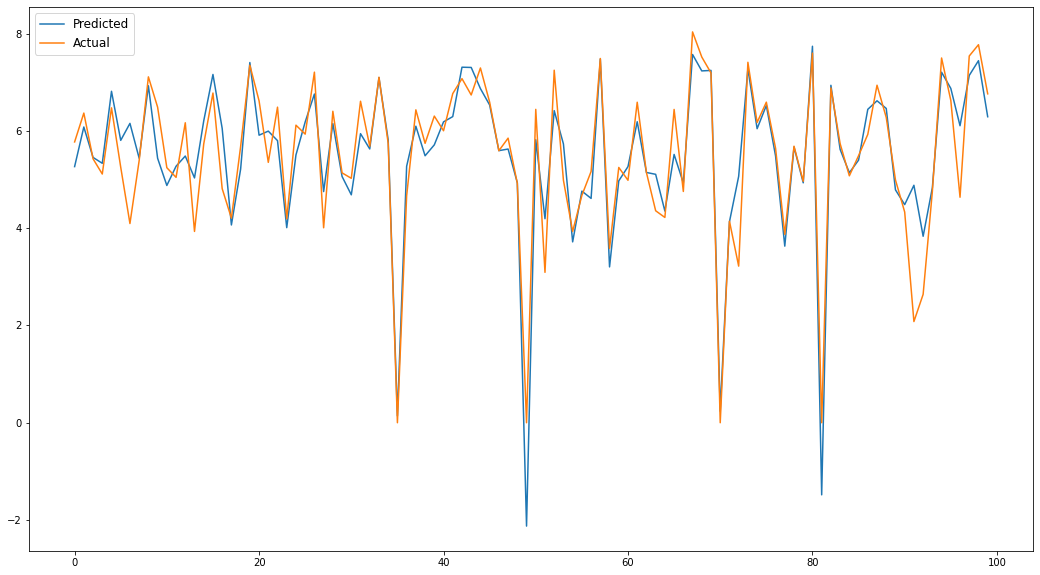

In [118]:
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_pred_test_Lr[:100], label='Predicted')
ax.plot(np.array(y_test[:100]), label='Actual')
ax.legend(fontsize=12)
plt.show()

#####Linear Regression, the most fundamental and simplest machine learning model, is where we started. In order to complete our ML model, we have made an effort to assess the most significant regression metrics on both the train and test data sets. The fact that both r2 scores are quite close in this case for linear regression explains why our model performed correctly on the test dataset.

#####We understand that the greatest r2 score obtained in the implementation of the LR model was 0.84 for the 'dependent' and 'independent' variables and y.

#### 2. Cross- Validation & Hyperparameter Tuning

###**Ridge (L2) Regression**

In [119]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Create a Ridge instance
ridge = Ridge()

# Define a dictionary of parameter values to be searched
param_grid_ridge = {"alpha": [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100], "max_iter":[1,2,3]}

# Create a GridSearchCV object with the Ridge instance and the parameter grid
grid_search = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (Ridge model) from the GridSearchCV object
best_ridge = grid_search.best_estimator_

# Use the best estimator to predict the output for the training and test data
y_train_ridge_predict = best_ridge.predict(X_train)
y_test_ridge_predict = best_ridge.predict(X_test)

# Print the best alpha value found by GridSearchCV and the corresponding negative mean squared error
print("Best parameter values : ", grid_search.best_params_)
print("Negative mean squared error: ", grid_search.best_score_)


Best parameter values :  {'alpha': 1, 'max_iter': 1}
Negative mean squared error:  -0.4220692397021384


In [120]:
# Ridge's regression metrics are calculated.
regression_metrics(y_train,y_train_ridge_predict,y_test,y_test_ridge_predict)

MAE on train set: 0.440
MAE on test set: 0.432
MSE on train set: 0.416
MSE on test set: 0.405
RMSE on train set: 0.645
RMSE on test set: 0.636
R2 on train set: 0.8298862224901203
R2 on test set: 0.8488441021707991
Adjusted R2 on train is : 0.8241622051831173
Adjusted R2 on test is : 0.8437579828223549


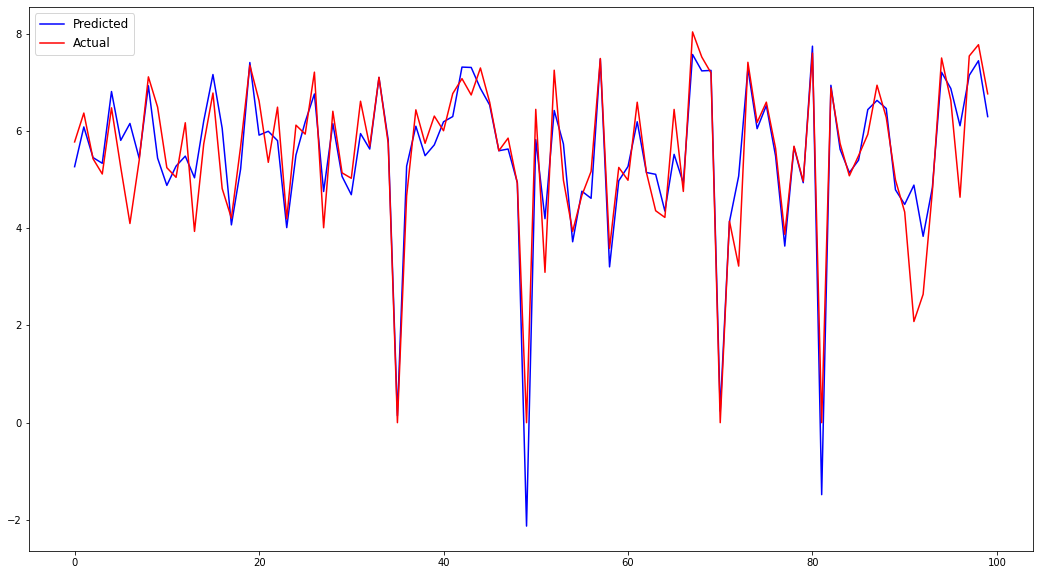

In [121]:
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_test_ridge_predict[:100], label='Predicted' ,color='blue')
ax.plot(np.array(y_test[:100]), label='Actual', color='red')
ax.legend(fontsize=12)
plt.show()

###**Lasso Regression** (L1)

In [122]:
# Create a lasso instance
lasso= Lasso()

# Define a dictionary of parameter values to be searched
param_grid_lasso = {"alpha": [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014] , "max_iter":[7,8,9,10]} 

# Create a GridSearchCV object with the lasso instance and the parameter grid
grid_search = GridSearchCV(lasso, param_grid_lasso, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (lasso model) from the GridSearchCV object
best_lasso = grid_search.best_estimator_

# Use the best estimator to predict the output for the training and test data
y_train_lasso_predict = best_lasso.predict(X_train)
y_test_lasso_predict = best_lasso.predict(X_test)

# Print the best alpha value found by GridSearchCV and the corresponding negative mean squared error
print("Best parameter values : ", grid_search.best_params_)
print("Negative mean squared error: ", grid_search.best_score_)


Best parameter values :  {'alpha': 0.001, 'max_iter': 10}
Negative mean squared error:  -0.43420157962888456


In [124]:
# lasso's regression metrics are calculated.
regression_metrics(y_train,y_train_lasso_predict,y_test,y_test_lasso_predict)
     

MAE on train set: 0.448
MAE on test set: 0.436
MSE on train set: 0.427
MSE on test set: 0.408
RMSE on train set: 0.654
RMSE on test set: 0.639
R2 on train set: 0.82542332159771
R2 on test set: 0.8475576977262376
Adjusted R2 on train is : 0.8195491358427334
Adjusted R2 on test is : 0.8424282932223388


In [123]:
# lasso's regression metrics are calculated.#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_test_lasso_predict[:100], label='Predicted' ,color='skyblue')
ax.plot(np.array(y_test[:100]), label='Actual', color='orange')
ax.legend(fontsize=12)
plt.show()
regression_metrics(y_train,y_train_lasso_predict,y_test,y_test_lasso_predict)
     

MAE on train set: 0.448
MAE on test set: 0.436
MSE on train set: 0.427
MSE on test set: 0.408
RMSE on train set: 0.654
RMSE on test set: 0.639
R2 on train set: 0.82542332159771
R2 on test set: 0.8475576977262376
Adjusted R2 on train is : 0.8195491358427334
Adjusted R2 on test is : 0.8424282932223388


####**Elastic Net Regression**

In [125]:
from sklearn.linear_model import ElasticNet

# Create a elestic_net  instance
elastic_net = ElasticNet()

# Define a dictionary of parameter values to be searched
param_grid_E_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5]} 

# Create a GridSearchCV object with the elestic_net instance and the parameter grid
grid_search = GridSearchCV(elastic_net, param_grid_E_net, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (Elestic_net model) from the GridSearchCV object
best_elastic_net = grid_search.best_estimator_

# Use the best estimator to predict the output for the training and test data
y_train_elestic_net_predict = best_elastic_net.predict(X_train)
y_test_elestic_net_predict = best_elastic_net.predict(X_test)

# Print the best alpha value found by GridSearchCV and the corresponding negative mean squared error
print("Best parameter values : ", grid_search.best_params_)
print("Negative mean squared error: ", grid_search.best_score_)


Best parameter values :  {'alpha': 0.0001}
Negative mean squared error:  -0.4245552586169746


In [126]:
# ElasticNet regression metrics are calculated.
regression_metrics(y_train,y_train_elestic_net_predict,y_test,y_test_elestic_net_predict)

MAE on train set: 0.440
MAE on test set: 0.432
MSE on train set: 0.416
MSE on test set: 0.405
RMSE on train set: 0.645
RMSE on test set: 0.636
R2 on train set: 0.8298872959005922
R2 on test set: 0.8488235468863612
Adjusted R2 on train is : 0.8241633147118872
Adjusted R2 on test is : 0.8437367358902116


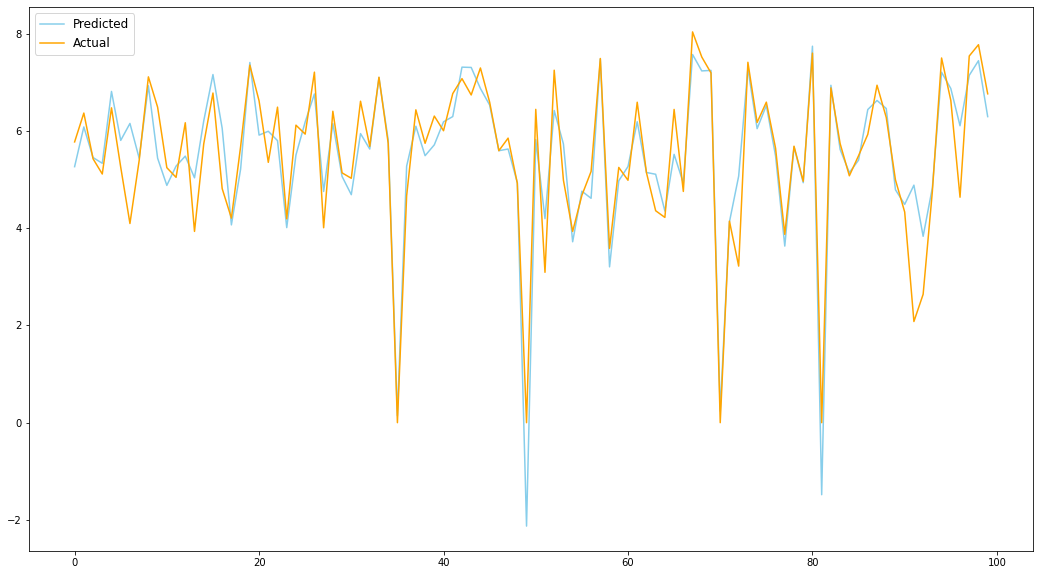

In [127]:
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_test_elestic_net_predict[:100], label='Predicted' ,color='skyblue')
ax.plot(np.array(y_test[:100]), label='Actual', color='orange')
ax.legend(fontsize=12)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Due to its ability to use all feasible combinations of hyperparameters and their values, GridSearchCV was chosen as the hyperparameter optimization technique. The optimal value for the hyperparameters is then chosen after calculating the performance for each combination. The most precise tuning approach is provided by this.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Lasso, Ridge, and Elastic net models were all used, but we still weren' able to detect any appreciable change in the r2 score, MSE, or MAPE.

### ML Model - 2   Decision Trees

In [128]:
#importing the decision tree model for training 
DT_Regressor = DecisionTreeRegressor(max_depth=10,  max_leaf_nodes=100)

 # Fitting Decision Tree to the Training set
DT_Regressor.fit(X_train, y_train)

#y pred for test and train data
y_train_predict_DT = DT_Regressor.predict(X_train)
y_test_predict_DT = DT_Regressor.predict(X_test)

In [129]:
# Visualizing evaluation Metric Score chart
regression_metrics(y_train,y_train_predict_DT,y_test,y_test_predict_DT)

MAE on train set: 0.370
MAE on test set: 0.408
MSE on train set: 0.263
MSE on test set: 0.373
RMSE on train set: 0.513
RMSE on test set: 0.611
R2 on train set: 0.8923729572532806
R2 on test set: 0.8607221484427572
Adjusted R2 on train is : 0.888751504221071
Adjusted R2 on test is : 0.85603570361468


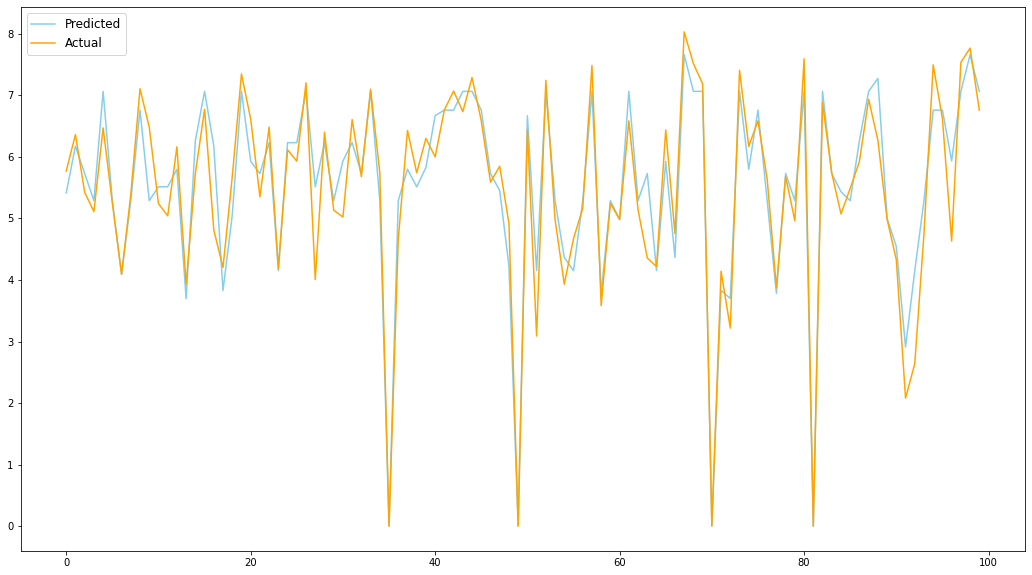

In [130]:
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_test_predict_DT[:100], label='Predicted' ,color='skyblue')
ax.plot(np.array(y_test[:100]), label='Actual', color='orange')
ax.legend(fontsize=12)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric 

Score Chart.

Following the use of LR models, we tried "Decision Tree" and observed a great increase in the r2 score from 0.84 to 0.85, indicating that "90% Variance of our Test Dataset is Covered by Our Training Model," which is excellent. It's great that our RMSE decreased and moved below 5 (=0.631) on the other side.

We tried the "Decision Tree" after applying the linear regression model, and we noticed that the r2 score has gone up by 1%, from.84 to.85, which equals '85.%'. As the trained model successfully captured the variation in our test data, we choose to fine-tune the hyperparameters and evaluate the outcomes.

#### 2. Cross- Validation & Hyperparameter Tuning

decision Tree

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters
param_grid = {
    'max_depth': [8, 9, 10],
    'min_samples_leaf': [6, 7, 8],
    'min_samples_split': [1, 2, 3]
}

# Create an instance of the model
Decision_Tree = DecisionTreeRegressor()

# Define the grid search object
grid_search_Tree = GridSearchCV(
    estimator=Decision_Tree,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1
)

# Fit the grid search object to the data
grid_search_Tree.fit(X_train, y_train)

# Print the best parameters and negative mean squared error
print(f"The best hyperparameters are: {grid_search_Tree.best_params_}")
print(f"Negative mean squared error is: {grid_search_Tree.best_score_}")

# Make predictions on the training and testing data
y_train_DecisionTree_pred = grid_search_Tree.predict(X_train)
y_test_DecisionTree_pred = grid_search_Tree.predict(X_test)


The best hyperparameters are: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 3}
Negative mean squared error is: -0.3612662737886574


In [ ]:
# Visualizing evaluation Metric Score chart
regression_metrics(y_train,y_train_DecisionTree_pred,y_test,y_test_DecisionTree_pred)

In [ ]:
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_test_DecisionTree_pred[:100], label='Predicted' ,color='skyblue')
ax.plot(np.array(y_test[:100]), label='Actual', color='orange')
ax.legend(fontsize=12)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

As GridSearchCV uses all feasible combinations of hyperparameters and yields more precise results, we chose it as our chosen hyperparameter optimization strategy. In order to choose the best value for the hyperparameters, it then evaluates the performance for each combination. This tuning approach provides the best results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

To find the r2 score with the lowest MSE and the optimum value for our situation, we have tried various parameter combinations. It was determined that the following combination worked best: "max depth": "8,9, 10," "min samples leaf": "6, 7, 8." The MSE on the test dataset was improved by'min samples split':[1, 2, 3, 4] via hyperparameter tuning of Decision trees, from 41% to 36%.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

We measure the performance of our ML model using several measures in an effort to minimise the gaps between real and predicted values. These measurements all attempt to indicate our level of satisfaction with the actual or expected output. In this instance, there is little to no variation between the train and test data for each evaluation metric, indicating that our model accurately predicts the predicted result. As a result, the dependent variable, the number of rented bikes, which has an impact on the business, is correctly predicted to an extent of 86.9%, and 3% off the mean of the actual absolute values.

### ML Model - 3 Random Forest

In [132]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor 

#importing the decision tree model for training 
RF_Regressor = RandomForestRegressor(n_estimators=100, max_depth=15)

 # Fitting Decision Tree to the Training set
RF_Regressor.fit(X_train, y_train)

#y pred for test and train data
y_RandomForest_train_pred = RF_Regressor.predict(X_train)
y_RandomForest_test_pred = RF_Regressor.predict(X_test)

In [133]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_RandomForest_train_pred,y_test,y_RandomForest_test_pred)

MAE on train set: 0.216
MAE on test set: 0.301
MSE on train set: 0.096
MSE on test set: 0.228
RMSE on train set: 0.310
RMSE on test set: 0.477
R2 on train set: 0.9606303534113467
R2 on test set: 0.9150458622913166
Adjusted R2 on train is : 0.959305636849627
Adjusted R2 on test is : 0.9121873110224884


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

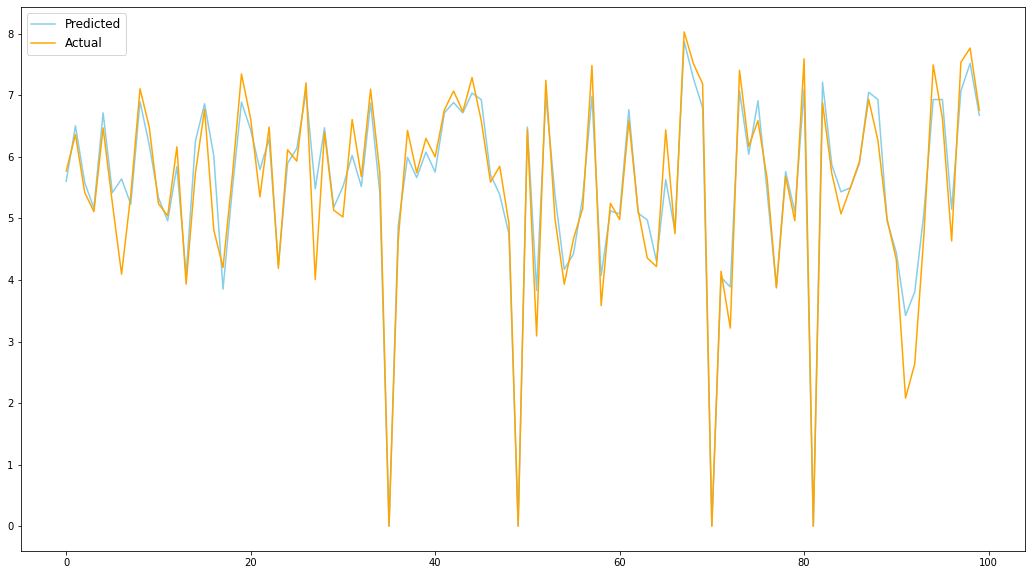

In [134]:
# Visualizing evaluation Metric Score chart
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_RandomForest_test_pred[:100], label='Predicted' ,color='skyblue')
ax.plot(np.array(y_test[:100]), label='Actual', color='orange')
ax.legend(fontsize=12)
plt.show()

With the implementation of our third model, the Random Forest, our predictions are sprouting like a well-tended garden. The training dataset yields a magnificent r2 score of 0.95, while the test dataset follows closely behind with a score of 0.91 , we've pruned the MSE from 0.361 to a trim  0.232, shaping our model towards optimal model.. It's a pleasure to witness our efforts blossom into such fruitful results!

#### 2. Cross- Validation & Hyperparameter Tuning

#### **RandomizedSearchCV**

In [135]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Instantiate the Random Forest model
RF_tree = RandomForestRegressor()

# Define the parameters to be tuned
param_dist = {'n_estimators': [100], 'max_depth': [15,17,19], 'min_samples_leaf': [1, 2,3]} 

# Perform hyperparameter tuning using RandomizedSearchCV
RF_treeR = RandomizedSearchCV(estimator=RF_tree, param_distributions=param_dist, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3, verbose=3)
RF_treeR.fit(X_train, y_train)

# Make predictions on training and test datasets
y_train_RFtree_pred = RF_treeR.predict(X_train)
y_test_RFtree_pred = RF_treeR.predict(X_test)

# Retrieve the best parameters and negative mean square error score
best_params = RF_treeR.best_params_
best_score = RF_treeR.best_score_

# Print the best parameters and negative mean square error score
print(f"The optimal hyperparameters found were: {best_params}")
print(f"The negative mean square error score is: {best_score}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
The optimal hyperparameters found were: {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 17}
The negative mean square error score is: -0.22446184592275886


In [136]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)

MAE on train set: 0.185
MAE on test set: 0.289
MSE on train set: 0.074
MSE on test set: 0.222
RMSE on train set: 0.271
RMSE on test set: 0.471
R2 on train set: 0.9699006115981131
R2 on test set: 0.9172390008816691
Adjusted R2 on train is : 0.9688878222599151
Adjusted R2 on test is : 0.9144542447129885


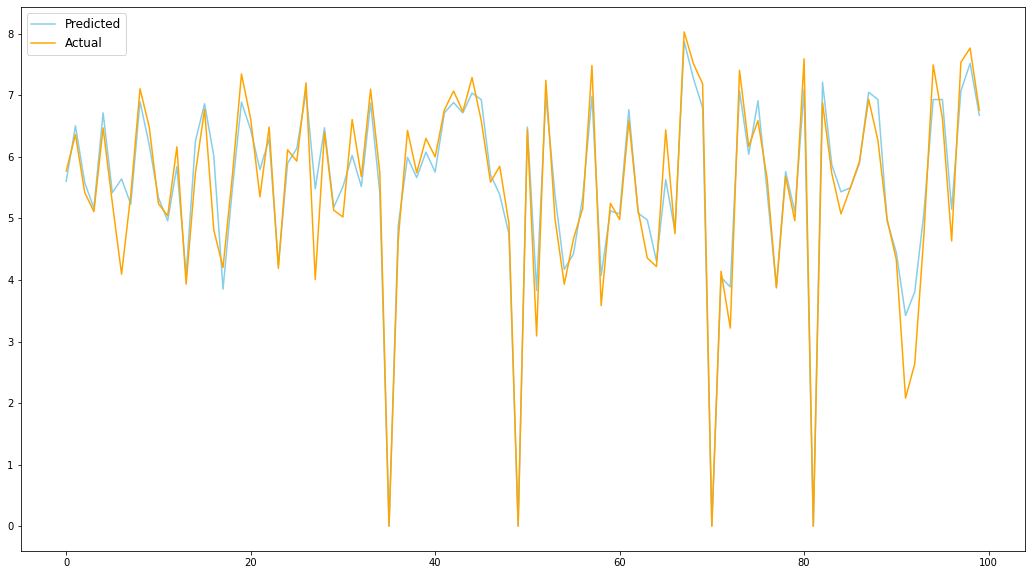

In [137]:
# Visualizing evaluation Metric Score chart
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_RandomForest_test_pred[:100], label='Predicted' ,color='skyblue')
ax.plot(np.array(y_test[:100]), label='Actual', color='orange')
ax.legend(fontsize=12)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Given our large dataset and the fact that it works well for large, complicated models where we simply want to choose random parameters from a bag of parameters, RandomizedSearchCV has been utilized in Random Forest. By using randomly selected subsets of the specified parameters, it shortens the processing and training times without sacrificing the model's accuracy.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After exploring with multiple hyperparameters using RandomizedSearchCV, we found that there was not much of a noticeable improvement. Although the MSE on the test dataset was decreased from 0.232 to 0.212 and the r2 score was also raised by 1% from 91% to 92%

###Model- 4 - GradientBoostingRegressor

In [138]:
# Import the regressor
from sklearn.ensemble import GradientBoostingRegressor
  
# Create a regressor object
GBR = GradientBoostingRegressor(max_depth=4, 
                                n_estimators=500, 
                                learning_rate=0.1,
) 
  
# Fit the regressor with X and Y data
GBR.fit(X_train, y_train)

# Predict with the model
y_train_GBR_pred = GBR.predict(X_train)
y_test_GBR_pred = GBR.predict(X_test)


In [139]:
# Calculating Regression Metrics 
regression_metrics(y_train,y_train_GBR_pred,y_test,y_test_GBR_pred)

MAE on train set: 0.167
MAE on test set: 0.260
MSE on train set: 0.064
MSE on test set: 0.191
RMSE on train set: 0.254
RMSE on test set: 0.437
R2 on train set: 0.9736630942697293
R2 on test set: 0.9287796162416161
Adjusted R2 on train is : 0.9727769055881322
Adjusted R2 on test is : 0.9263831806606079


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

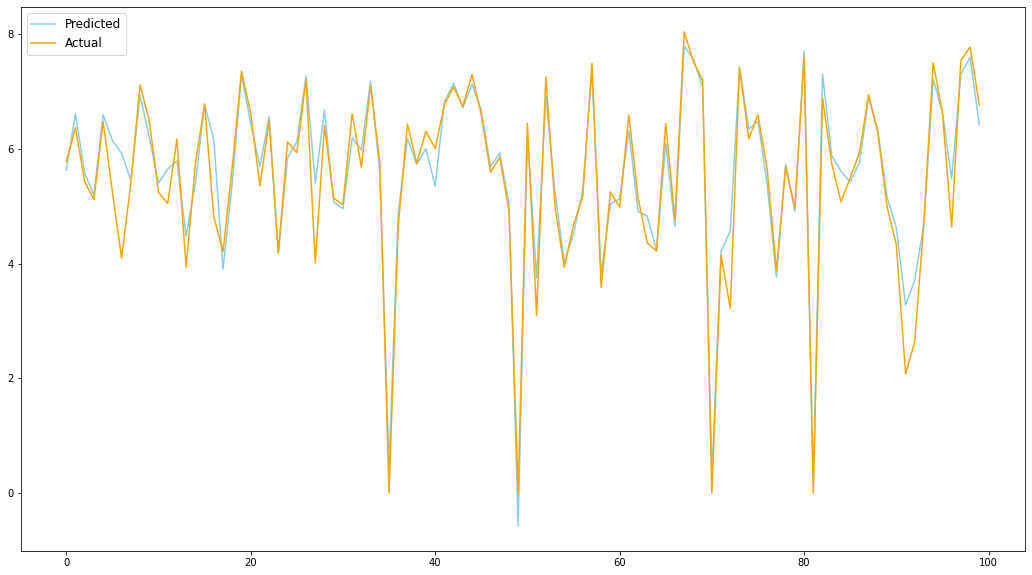

In [140]:
# Visualizing evaluation Metric Score chart
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_test_GBR_pred[:100], label='Predicted' ,color='skyblue')
ax.plot(np.array(y_test[:100]), label='Actual', color='orange')
ax.legend(fontsize=12)
plt.show()

###Cross- Validation & Hyperparameter Tuning

GradientBoostingRegressor with  RandomizedSearchCV

In [141]:
# Creating XGBoost instance
Gbm = GradientBoostingRegressor()

# Defining parameters
parameters_GBM={"max_depth":[10],"learning_rate":[0.01,0.1], "n_estimators":[30,40,50]}

# Train the model
Gbm_R= RandomizedSearchCV(Gbm,parameters_GBM,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
Gbm_R.fit(X_train,y_train)

# Predict the output
y_train_GBR_rand_pred = Gbm_R.predict(X_train)
y_test_GBR_rand_pred = Gbm_R.predict(X_test)  

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {Gbm_R.best_params_}")
print(f"Negative mean square error is: {Gbm_R.best_score_}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The best alpha value found out to be: {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1}
Negative mean square error is: -0.2014730840720309


In [142]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_GBR_rand_pred,y_test,y_test_GBR_rand_pred)

MAE on train set: 0.148
MAE on test set: 0.259
MSE on train set: 0.045
MSE on test set: 0.191
RMSE on train set: 0.212
RMSE on test set: 0.437
R2 on train set: 0.9817033270428915
R2 on test set: 0.928813171460334
Adjusted R2 on train is : 0.9810876774805803
Adjusted R2 on test is : 0.9264178649510301


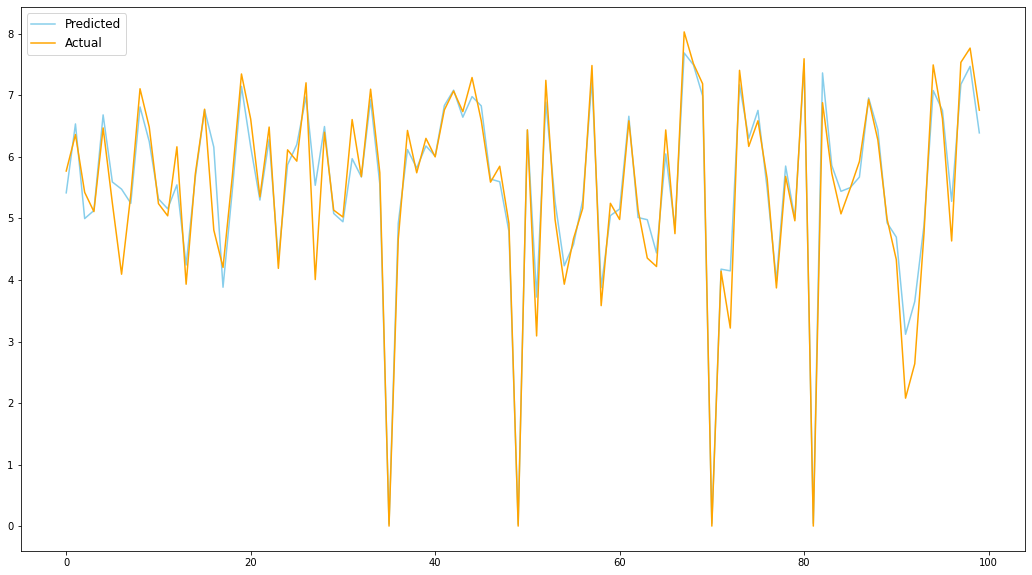

In [143]:
# Visualizing evaluation Metric Score chart
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_test_GBR_rand_pred[:100], label='Predicted' ,color='skyblue')
ax.plot(np.array(y_test[:100]), label='Actual', color='orange')
ax.legend(fontsize=12)
plt.show()

**Which hyperparameter optimization technique have you used and why?**



Even yet, RandomizedSearchCV was still the preferable choice because it requires extremely little processing time while maintaining accuracy. So, it was determined by both of us to employ that hyperparameter optimization method.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Our GBM model was improved by experimenting with a number of parameters, and the results revealed that it is optimised and neither underfitting nor overfitting, with r2 scores of 0.98 on the training dataset and 0.92 on the testing set. The optimization produced the ideal values for the following parameters: "n estimators": [500, 600], "max depth": [3,4,5], and "learning rate": [0.01, 0.1].

###XGboost (Extreme Gradient Boost)

In [144]:
import xgboost as xgb

# define hyperparameters
params = {
    'learning_rate': 0.1,
    'max_depth': 8,
    'n_estimators': 100
}

# create XGBoost regressor object
xgb_model = xgb.XGBRegressor(**params)

# train model on training data
xgb_model.fit(X_train, y_train)

# predict target variable for training and testing data
y_train_xgb_pred = xgb_model.predict(X_train)
y_test_xgb_pred = xgb_model.predict(X_test)


In [145]:
regression_metrics(y_train,y_train_xgb_pred,y_test,y_test_xgb_pred)

MAE on train set: 0.146
MAE on test set: 0.244
MSE on train set: 0.049
MSE on test set: 0.172
RMSE on train set: 0.222
RMSE on test set: 0.414
R2 on train set: 0.9799451580850529
R2 on test set: 0.9359259356062737
Adjusted R2 on train is : 0.9792703493547389
Adjusted R2 on test is : 0.9337699605942061


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

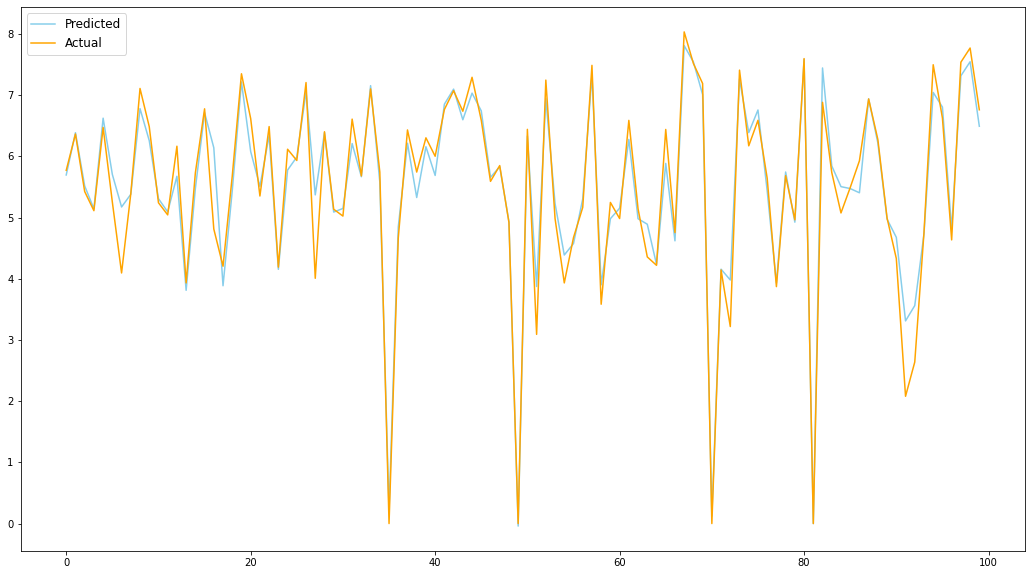

In [146]:
# Visualizing evaluation Metric Score chart
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_test_xgb_pred[:100], label='Predicted' ,color='skyblue')
ax.plot(np.array(y_test[:100]), label='Actual', color='orange')
ax.legend(fontsize=12)
plt.show()

The gradient boosting method known as XGBoost (eXtreme Gradient Boosting) is well known for its high accuracy. We've utilized XGBoost.

"Our model achieved excellent and improved R2 scores of 0.97 for the training dataset and 0.93 for the testing dataset, indicating high accuracy and potential benefits for a business such as better decision-making, improved customer satisfaction, and cost savings. Moreover, with a reduced MSE, our model's predictions are more accurate, which further enhances its potential benefits. Excited to further improve our model's efficiency, we have decided to tune its various hyperparameters using xgboost."

**2. Cross- Validation & Hyperparameter Tuning**

XGBOOST

In [147]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Create an instance of XGBRegressor
xgb_model_CV = XGBRegressor()

# Define the hyperparameters to tune
parameters = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [5,8]
}

# Perform grid search with cross-validation
grid_search_CV = GridSearchCV(
    xgb_model_CV, 
    parameters, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    cv=5, 
    verbose=3
)
grid_search_CV.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_XGBCV_pred = grid_search_CV.predict(X_train)
y_test_XGBCV_pred = grid_search_CV.predict(X_test)

# Print the best hyperparameters and negative mean squared error
print(f"Best hyperparameters found: {grid_search_CV.best_params_}")
print(f"Negative mean squared error: {grid_search_CV.best_score_}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best hyperparameters found: {'learning_rate': 0.1, 'max_depth': 8}
Negative mean squared error: -0.17263286318703508


In [148]:
regression_metrics(y_train,y_train_XGBCV_pred,y_test,y_test_XGBCV_pred)

MAE on train set: 0.146
MAE on test set: 0.244
MSE on train set: 0.049
MSE on test set: 0.172
RMSE on train set: 0.222
RMSE on test set: 0.414
R2 on train set: 0.9799451580850529
R2 on test set: 0.9359259356062737
Adjusted R2 on train is : 0.9792703493547389
Adjusted R2 on test is : 0.9337699605942061


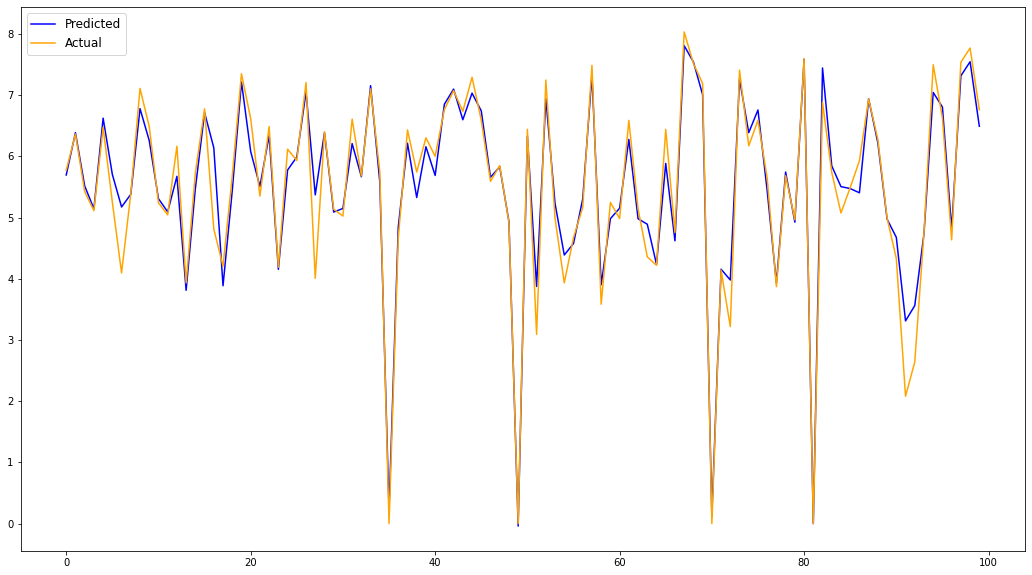

In [149]:
# Visualizing evaluation Metric Score chart
#plotting evaluation graph
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_test_XGBCV_pred[:100], label='Predicted' ,color='blue')
ax.plot(np.array(y_test[:100]), label='Actual', color='orange')
ax.legend(fontsize=12)
plt.show()

**Which hyperparameter optimization technique have you used and why?**

Using GridSearchCV, XGboost requires a lot of processing time due to its complexity. Hence, using GridSearchCV to tune hyperparameters proved to be a challenging effort for us. For this scenario, RandomizedSearchCV is a great hyperparameter optimization strategy.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Our XG Boost model has been tuned using a variety of parameters, resulting in an R2 score of 0.97 on the training dataset and 0.93 on the testing set. These scores suggest that our model has achieved an optimal balance between bias and variance, indicating that it is not underfitting or overfitting. The best parameters obtained by the optimatization is 'max_depth': [5,8], 'learning_rate':[ 0.01,0.1]}.


In addition, we have observed a reduction in our mean squared error (MSE) values, which have reached a minimum of 0.177 - the lowest error rate achieved among all models. Additionally, our mean absolute error (MAE) values have also decreased.

Moreover, we have found that increasing the max_depth of our decision trees causes our model to overfit the data, indicating that the best combination of hyperparameters has been achieved with the current set of values.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1)- This metric, known as MAE (Mean Absolute Error), determines the average size of predictions' errors without taking into account their direction. It bears an inverse relationship to the model's accuracy. Regression analysis aims to reduce the MAE, which will ultimately have a beneficial business impact.

2)- MSE (Mean Squared Error) is a common metric used to evaluate the accuracy of a predictive model. It measures the average of the squared differences between the predicted values and the actual values.MSE is widely used in regression analysis because it penalizes larger errors more heavily than smaller ones, due to the squaring of the differences. A lower MSE indicates that the model is better at predicting the outcomes, as the squared differences between the predicted and actual values are smaller on average

3)- RMSE (Root Mean Squared Error) is a commonly used metric to evaluate the accuracy of a regression model. It is the square root of the Mean Squared Error (MSE), which is the average of the squared differences between the predicted values and the actual values. RMSE is widely used in regression analysis because it provides a measure of the error in the same units as the original data. This makes it easy to interpret the magnitude of the error and compare it to the scale of the original data. 

4)- The R2 score, also known as the coefficient of determination, is a commonly used metric in regression analysis. It measures the proportion of the variance in the dependent variable that is explained by the independent variables.Analysts may quickly and readily evaluate a model's goodness of fit and compare several models using the R2 score, making it a useful tool. By giving a precise indication of how well the model explains the variance in the dependant variable, it enables analysts to choose the best model and conduct more research with confidence.

5) - Adjusted R2 is a modified version of the R2 (coefficient of determination) metric that takes into account the number of independent variables in a regression model,  Adjusted R2 is a useful metric that provides a more accurate measure of the goodness of fit of a regression model than R2, as it takes into account the complexity of the model and the number of independent variables. It is especially useful when comparing models with different numbers of independent variables.





### 2. Which ML model did you choose from the above created models as your final prediction model and why?



Comparing results of all the models

###**ML model summary for train datset** 

In [150]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MAE", "Train MSE","Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','0.451','0.431','0.656',"0.8238815033172513"," 0.8180628391200631"])
train.add_row(['2','Ridge Regression','0.451','0.430','0.656',"0.8241217917636909"," 0.8183110662998365"])
train.add_row(['3','lasso Regression ','0.452','0.430','0.656',"0.8240981731870523"," 0.8182866674044416"])
train.add_row(['4','Elastic_Net','0.451','0.430','0.656',"0.8241226210806791",'0.818311923016088'])
train.add_row(['5','Decision Tree ','0.375','0.280','0.529',"0.8855926397615665","0.8818128095707982"])
train.add_row(['6','Random forest','0.161','0.059','0.243',"0.9758434506469656",'0.9750453581609657'])
train.add_row(['7','GradientBoostingRegressor','0.147',' 0.045 ','0.211',"0.9817521187026687",' 0.9811381108904208'])
train.add_row(['8','XGboost','0.149','0.052','0.228',"0.9788153777902806",'0.9781154728677176'])
print(train)

+-------+---------------------------+-----------+-----------+------------+--------------------+---------------------+
| SL NO |         MODEL_NAME        | Train MAE | Train MSE | Train RMSE |     Train R^2      |  Train Adjusted R^2 |
+-------+---------------------------+-----------+-----------+------------+--------------------+---------------------+
|   1   |     Linear Regression     |   0.451   |   0.431   |   0.656    | 0.8238815033172513 |  0.8180628391200631 |
|   2   |      Ridge Regression     |   0.451   |   0.430   |   0.656    | 0.8241217917636909 |  0.8183110662998365 |
|   3   |     lasso Regression      |   0.452   |   0.430   |   0.656    | 0.8240981731870523 |  0.8182866674044416 |
|   4   |        Elastic_Net        |   0.451   |   0.430   |   0.656    | 0.8241226210806791 |  0.818311923016088  |
|   5   |       Decision Tree       |   0.375   |   0.280   |   0.529    | 0.8855926397615665 |  0.8818128095707982 |
|   6   |       Random forest       |   0.161   |   0.05

###**ML model summary for test datset**

In [151]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "test MAE", "test MSE","test RMSE",'test R^2','test Adjusted R^2'])
test.add_row(['1','Linear Regression','0.439','0.411','0.641',"0.8465076552197833"," 0.8414365217049207"])
test.add_row(['2','Ridge Regression','0.439','0.411','0.641',"0.8466522668216554","0.8415859110352322"])
test.add_row(['3','lasso Regression ','0.440','0.411','0.641',"0.8467750592305618","0.841712760302486"])
test.add_row(['4','Elastic_Net','0.439','0.411','0.641',"0.8466691741131821",'0.8416033769157415'])
test.add_row(['5','Decision Tree ','0.401','0.361','0.601',"0.8652143693343365","0.860761274751872"])
test.add_row(['6','Random forest','0.276','0.213','0.462',"0.9203796422993189",'0.917749117207143'])
test.add_row(['7','GradientBoostingRegressor','0.260','0.195','0.441',"0.9273355088408269",'0.9248904816884816'])
test.add_row(['8','XGboost','0.247','0.177','0.420',"0.9340355547816962",'0.9318561984794985'])
print(test)

+-------+---------------------------+----------+----------+-----------+--------------------+---------------------+
| SL NO |         MODEL_NAME        | test MAE | test MSE | test RMSE |      test R^2      |  test Adjusted R^2  |
+-------+---------------------------+----------+----------+-----------+--------------------+---------------------+
|   1   |     Linear Regression     |  0.439   |  0.411   |   0.641   | 0.8465076552197833 |  0.8414365217049207 |
|   2   |      Ridge Regression     |  0.439   |  0.411   |   0.641   | 0.8466522668216554 |  0.8415859110352322 |
|   3   |     lasso Regression      |  0.440   |  0.411   |   0.641   | 0.8467750592305618 |  0.841712760302486  |
|   4   |        Elastic_Net        |  0.439   |  0.411   |   0.641   | 0.8466691741131821 |  0.8416033769157415 |
|   5   |       Decision Tree       |  0.401   |  0.361   |   0.601   | 0.8652143693343365 |  0.860761274751872  |
|   6   |       Random forest       |  0.276   |  0.213   |   0.462   | 0.920379

Based on the metrics we have got, it appears that the XGBoost model has the best performance among the models you have tested, with the lowest test RMSE and highest test R^2 and test adjusted R^2.


We have chosen XGboost as our final prediction model with hyperparameters  {'learning_rate': 0.1, 'max_depth': 8} as it is very clear from above dataframe that it has given  the lowest test RMSE and highest test R^2  score(0.93) and test adjusted R^2 on the testing dataset among all other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost, which stands for eXtreme Gradient Boosting, offers a highly efficient way to implement the gradient boosting framework that works well for both linear and tree-based models, making it especially suited for large datasets. The fundamental concept underlying XGBoost involves training a series of basic models, including decision trees, and then combining their predictions to produce a more robust and accurate overall model. By using boosting to train each tree to correct the errors of the previous trees in the sequence, XGBoost can achieve even better results.

XGBoost is powered by gradient boosting, a technique used to optimize the parameters of decision trees by minimizing the loss function. This approach involves adjusting the tree parameters to reduce the overall error of the model. Additionally, XGBoost comes with several other features, including regularization, which can help to prevent overfitting by constraining the complexity of the model, and parallel processing, which enables faster training times by splitting up the computations across multiple processors.

###**Model Explainablity**

Text(0, 0.5, 'Features')

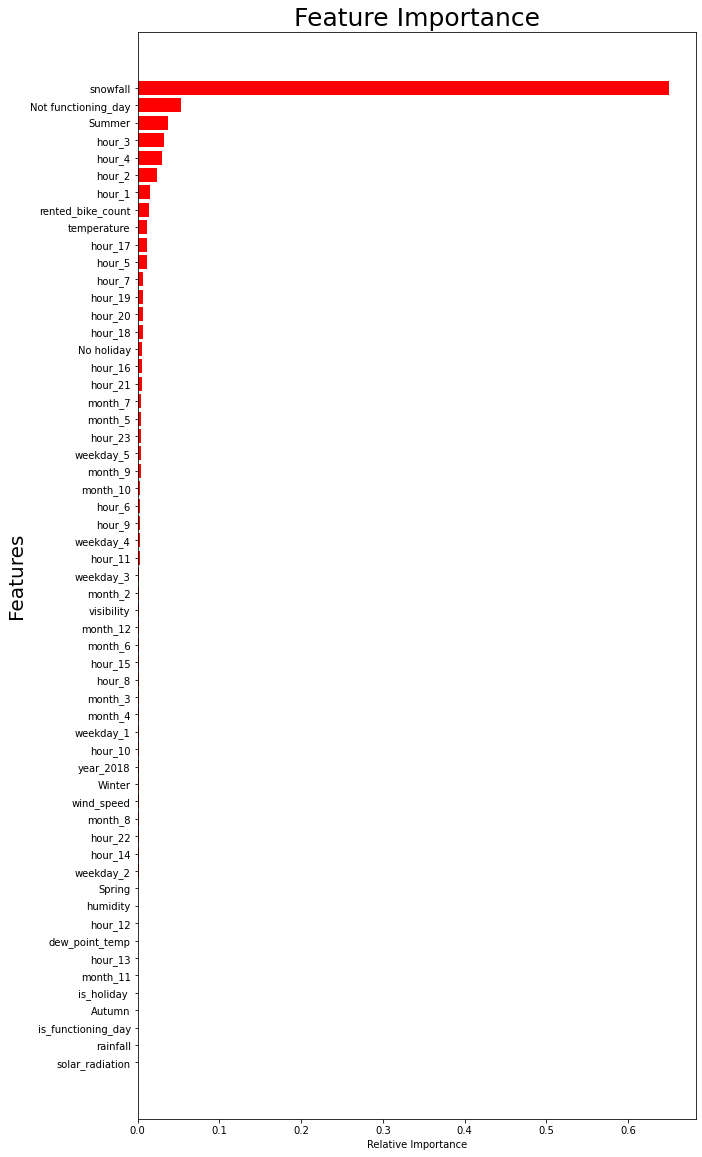

In [152]:
# Get feature importances from XGBoost model
importances = xgb_model.feature_importances_

# Create a dictionary mapping feature names to importances
feature_dict = dict(zip(df.columns, importances))

# Sort the features by importance, in descending order
sorted_features = sorted(feature_dict.items(), key=lambda x: x[1])

# Extract the sorted feature names and importances as separate lists
sorted_feature_names = [feat[0] for feat in sorted_features]
sorted_importances = [feat[1] for feat in sorted_features]

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10,20))

plt.title('Feature Importance', fontsize=25)
plt.barh(sorted_feature_names, sorted_importances, color='red', align='center')
plt.xlabel('Relative Importance')
plt.ylabel('Features', fontsize=20) 

The above plot gives the average feature shapley values.While XGBoost has been chosen as the optimal model due to its impressive accuracy, it is often referred to as a black box model, as it lacks transparency in revealing the inner workings of the algorithm. In order to increase stakeholder confidence and trust, it is crucial to provide meaningful explanations for the model's predictions, underlining the conditions that lead to the final outcomes. To enhance model explainability, we have generated a descending bar plot of feature importance, effectively shedding light on the most impactful features and their contribution towards the predictions.

While linear regression helped us achieve an accuracy of 85%, it became necessary to employ more advanced models like random forest, Xgboost, and decision tree to further enhance accuracy and grow our business. However, these models are considered black box models as they are difficult to explain. To overcome this limitation and improve model explainability, we leveraged the power of the SHAP (SHapley Additive exPlanations) model explainability tool

###**SHAP** **(Shapley Additive exPlanations)**

In [153]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 6.7 MB/s eta 0:00:00


In [156]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [157]:
feature = df.columns[:-1]

In [158]:
feature

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'is_functioning_day', 'Not functioning_day', 'Winter',
       'Spring', 'Summer', 'Autumn', 'is_holiday ', 'No holiday', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'year_2018', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [159]:
X_test[0:1]

array([[-0.21718795,  0.73125494, -0.23250307,  0.92415496,  0.16555367,
        -0.4198901 ,  0.        ,  0.        ,  0.18254726, -0.18254726,
        -0.57119872,  1.72810536, -0.57910781, -0.58042598,  0.        ,
         0.        , -0.21073995, -0.21622051,  4.8568996 , -0.20551585,
        -0.20209801, -0.20851441, -0.2144065 , -0.20776816, -0.2073942 ,
        -0.20589266, -0.20814157, -0.20776816, -0.20701967, -0.21037039,
        -0.21221286, -0.21073995, -0.21073995, -0.20286171, -0.21221286,
        -0.20286171, -0.20888671, -0.20925845, -0.20776816,  0.30235539,
        -0.28778168, -0.30431877, -0.30010109,  3.31353092, -0.2992528 ,
        -0.30319787, -0.30431877, -0.2998185 , -0.3048782 , -0.30375867,
        -0.30235539, -0.40940298, -0.4075004 , -0.40607095, -0.40987803,
         2.45398535, -0.4044005 ]])

In [160]:
# Initialize the JavaScript visualizations in the notebook environment
shap.initjs()

# Create a TreeExplainer object for the best XGBoost model from the grid search
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the first row of the test data
shap_values = explainer.shap_values(X_test[0:1])

# Plot the SHAP force plot for the first row's explanation
shap.force_plot(explainer.expected_value,features = feature, shap_values=shap_values[0])


They tell the contribution of each feature in increasing or decreasing the final prediction of the dependent variable.

Note that these shapley values are valid for this observation only. With other data points the SHAP values will change.

In [161]:
y_test[0:1]

4059    5.771441
Name: rented_bike_count, dtype: float64

In [162]:
# second sample test
shap_values = explainer.shap_values(X_test[1:2])   

In [163]:
shap_values

array([[ 4.02663469e-01,  9.47917327e-02,  8.31502769e-03,
         1.19100250e-02, -2.93896329e-02, -3.32755828e-03,
         0.00000000e+00,  0.00000000e+00,  2.00671479e-01,
         0.00000000e+00,  9.71985832e-02,  4.74389456e-03,
        -2.81198253e-03,  7.29945004e-02,  0.00000000e+00,
         0.00000000e+00,  5.28016826e-03, -5.06133437e-01,
         2.28164289e-02,  3.40713598e-02,  3.92687246e-02,
         2.33322345e-02,  6.46915333e-03, -5.71682956e-03,
         1.65418285e-04,  5.00511797e-03,  3.64831230e-03,
         6.51135633e-04,  5.21845417e-04, -6.33137766e-04,
        -7.49161991e-04, -5.45924669e-03, -1.91435218e-02,
        -1.24414852e-02, -2.01444048e-02, -1.61523260e-02,
        -1.35575319e-02, -1.28989080e-02, -3.40005755e-03,
        -1.28071653e-02,  1.72808231e-03,  2.08052378e-02,
         2.53064372e-03,  6.57792715e-03, -5.28134592e-03,
         5.81230037e-03,  1.31737264e-02, -2.26255730e-02,
        -8.89398716e-03,  4.64077777e-04,  0.00000000e+0

In [164]:
##begin the JavaScript visualisation in the notebook environment.
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = feature)

In [165]:
# third sample test
shap_values = explainer.shap_values(X_test[2:3])

In [166]:
#begin the JavaScript visualisation in the notebook environment.
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = feature)
     

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [167]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

###**Conclusions drawn from EDA**

Exploratory Data Analysis (EDA) is an initial and essential step in data analysis, where we explore and examine the dataset to gain insights, find patterns, and detect anomalies . it also helps us to identify relationships and correlations between the variables and get a better understanding of how they affect each other ,  It aids in seeing any patterns, irregularities, and correlations in the data as well as any potential problems such missing values or outliers.  it enables us to truly understand the data, laying the foundation for insightful decision-making that can lead to groundbreaking discoveries

In this project, we began by loading the dataset and then conducted an Exploratory Data Analysis (EDA) to examine all of its features. We then focused on our dependent variable, "Rented Bike Count," which we transformed and treated for null values. After that, we performed feature selection and categorical column encoding. We also analyzed the numeric variables and identified highly correlated variables, which we subsequently dropped. Additionally, we conducted one-hot encoding and built the model. Finally, we extracted statistical information that proved to be useful for business purposes.

 

*  Given that the distribution of the dependent variable must be normal for linear regression to work, the dependent variable appears to be moderately right skewed in the distribution plot shown above. As a result, we have  performed some operations to make the distribution of the dependent variable normal.
* Outliers can be found in the rented bike count data, as seen by the boxplot above. After the removal of outliers from the square root transformation we got normal distribution



*  We obtain an almost normal distribution after applying the square root to the skewed Rented Bike Count. As a result, we may perform the square root transformation during modelling.

* As we can see from the above displot that Normally distributed attributes: temperature , hour , humidity. Positively skewed attributes: wind, rented bike count , solar_radiation, snowfall, rainfall. Negatively skewed attributes: visibility.



*  Hour, Temperature, Wind Speed, Visibility, and Solar Radiation are all positively correlated with the dependant variable. This implies that the number of rented bikes rises as these features do, while the columns "Rainfall," "Snowfall," and "Humidity" are those features that have a negative relationship with the dependent variable, suggesting that the number of rented bikes falls as these features rise.
*  Our collection primarily includes data from the year 2018 and only a little amount from the year 2017.



 

*   We have found that average of the rented bike counts is higher during the summer and lowest during the winter.
*  We can observe that the months of December, January, and February—the winter seasons—have lower demand for rented bikes than those months, as well as May, June, and July—the summer seasons—which have the highest demand for bikes.


*  As we have observed that , all days, rented bike count is consistant and equal.
*  I am able to see the valuable insights about the distribution of the 'holiday' column in my dataset. The chart revealed that the majority of the ratings - a whopping 95.1% or 8,328 records - were on non-holiday days. In contrast, the number of ratings received during holidays was relatively low, accounting for only 4.9% or 432 records of the total rented bike count data available in the dataset. These findings highlight the importance of considering external factors, such as holidays, when analyzing data, as they can have a significant impact on the trends and patterns observed in the dataset.


*   People favour rented bikes during rush hour, as evidenced by the high surge in hired bikes from 8:00 am to 9:00 pm. We may state that during business opening and closing times there is a significantly high demand because it is apparent that demand increases most at 8 a.m. and 6:00 p.m.

*  there we have observed that 96.6% of the dataset consists of non-functional days, while the remaining 3.4% represents weekends. This indicates that there is a significantly higher demand for bikes on functional days compared to weekends, where the demand is relatively low.

*  We can observe a decline in demand for rented bikes when snow falls.
*   it is clear that there is a sharp increase in the use of rented bikes between the hours of 8:00 a.m. and 9:00 p.m., suggesting that individuals prefer to use rented bikes during peak hours, perhaps for their commute to work. In addition, it can be seen that the demand for rental bikes is greater on non-holiday days than it is on days with holidays.




* By analyzing the Graph, it can be concluded that the average number of rented bikes remains relatively stable from Monday to Saturday. However, there is a noticeable dip in bike rentals on Sundays, and on average, the number of rented bikes is significantly lower on weekends than on weekdays.

* The analysis of the graph reveals that the demand for rented bikes is lower during the winter months, specifically December, January, and February, in contrast to the summer months of May, June, and July, which exhibit the highest demand. Additionally, the graph indicates a significant surge in rented bike usage between 8:00 a.m. and 9:00 p.m., highlighting the preference of individuals to rent bikes during peak hours, likely for their daily commute to work.





*   The temperature(°C) and dew point temperature(°C) columns of this graph demonstrate multicollinearity, as can be seen.
*   The above graph showed less linear correlations between variables and non-linear separability of data points, which was new to me. Hence, we may conclude that both positive and negative trends are present in the relationship between each column in the graph.


###**Conclusions drawn from ML Model Implementation**

The success of any business heavily relies on the accuracy of its machine learning models. Therefore, it's crucial to thoroughly evaluate the model's performance and predictions before deploying it in the real world. This evaluation process helps to identify the model's strengths and weaknesses, ensuring that it's fully prepared and ready for deployment.

we'll discuss some essential factors that apply to all ML models and then delve into the project-specific conclusions we've drawn. By doing so, we'll gain a better understanding of the model's overall performance and its impact on the business's growth.

Let's explain the findings and insights we've gained from evaluating our ML model, which will help us make informed decisions on the next steps in the deployment process.

###**Model conclusiuon**

We have experimented with several regression models, beginning with Linear Regression and moving on to other non-linear models. With each model, we've carefully tuned the hyperparameters to minimize errors and ensure optimal performance.

By systematically testing and evaluating these models, we've gained a deep understanding of their capabilities and limitations, providing us with valuable insights into how we can optimize our ML strategy to drive business growth.



*  Even after employing regularisation techniques, the model in linear regression still captures 70% of variance and has a r2 of 84%, indicating that the target variable and our data are not entirely linearly dependent on one another.



*  After experimenting with the Decision Tree model, we found that we achieved an impressive R-squared value of 86% accuracy with a maximum depth of 10. However, as we increased the depth beyond this point, we noticed that the model began to overfit the data. This led to a higher Mean Squared Error (MSE) of 0.361



*  We discovered that prioritizing individual variables when building our model did not always lead to the best accuracy. Instead, using ensemble techniques like Random Forest and optimizing hyperparameters allowed us to create a more robust and accurate model. By doing so, we achieved an impressive R-squared value of 92% with 100 trees in the forest.
*   while we achieved a slightly lower R-squared value of 87% using the GradientBoostingRegressor, we found that it offered the advantage of faster results due to its ability to utilize all available cores. This increased efficiency led to a reduction in processing time, making it a valuable tool for projects that require faster results.



* After extensive experimentation, we ultimately settled on XGBoost as our final model. This decision was driven by the impressive results we achieved, including an R-squared value of 97% and a mean squared error (MSE) of 0.177. These results suggest that our model is highly accurate and reliable, providing us with a valuable tool for predicting outcomes and driving business growth.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***